# E-Commerce: Product Range Analysis

**Task:**

****Conduct an In-depth Analysis of the Store's Product Portfolio.****

- Perform Exploratory Data Analysis
- Analyze the Product Assortment
- Formulate and Validate Statistical Hypotheses

**Description of the Data:**

The provided dataset encompasses the transactional records of an e-commerce platform specializing in household goods.

The file `ecommerce_dataset_us.csv` includes the following columns:

- `InvoiceNo`: Unique order identifier
- `StockCode`: Distinct item identifier
- `Description`: Detailed item description
- `Quantity`: Quantity of items purchased
- `InvoiceDate`: Date of the transaction
- `UnitPrice`: Price per item
- `CustomerID`: Unique customer identifier


###  <p style="color: blue;">Data preprocessing</p>

####  Install and Import all necessary libraries

In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.4-cp39-cp39-macosx_10_15_x86_64.whl (17.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


import all the necessary library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics.pairwise import cosine_similarity
import datetime
import plotly.express as px
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefaniachiesa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefaniachiesa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stefaniachiesa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

read the data:

In [5]:
try:
  
    df = pd.read_csv('ecommerce_dataset_us.csv',sep='\t' )
    
except:
    
    df = pd.read_csv('http://localhost:8888/edit/Downloads/ecommerce_dataset_us.csv',sep='\t' )

overview of the data:

In [6]:
df.sample(10)

InvoiceNo StockCode                         Description  Quantity  \
331210    565995     20728                 LUNCH BAG CARS BLUE         2   
489394    578013     22493           PAINT YOUR OWN CANVAS SET         1   
437021    574258     23083    SET 6 PAPER TABLE LANTERN STARS          1   
373521    569332     22398          MAGNETS PACK OF 4 SWALLOWS         2   
235636    557644    72351A  SET/6 TURQUOISE BUTTERFLY T-LIGHTS         1   
114011    546005     21397              BLUE POLKADOT EGG CUP         12   
253599    559163     23084                  RABBIT NIGHT LIGHT         3   
111101    545713     22355           CHARLOTTE BAG SUKI DESIGN       228   
43647     540099     21670       BLUE SPOT CERAMIC DRAWER KNOB        12   
401090    571418     22804   PINK HANGING HEART T-LIGHT HOLDER         3   

             InvoiceDate  UnitPrice  CustomerID  
331210  09/06/2019 11:48       1.65     16076.0  
489394  11/20/2019 12:55       1.65     17360.0  
437021  11/01/2019 13:50       3.75     16891.0  
373521  10/01/2019 13:46       0.39     12637.0  
235636  06/19/2019 17:06       4.13         NaN  
114011  03/06/2019 15:17       0.39     14426.0  
253599  07/04/2019 16:33       4.13         NaN  
111101  03/05/2019 10:11       2.46         NaN  
43647   01/02/2019 16:41       1.25     15808.0  
401090  10/15/2019 12:35       2.95     16412.0

look at datatype an missing values:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


We'll need to change some datatype and approach missing values.

Convert all strings to lowercase:

In [8]:
df=df.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

In [9]:
df.sample(5)

InvoiceNo StockCode                     Description  Quantity  \
522998    580500     23393  home sweet home cushion cover         12   
211529    555383     22629             spaceboy lunch box          2   
179445    552277     22894   tablecloth red apples design          1   
241078    558127     21137        black record cover frame       120   
168322    551016         m                          manual         2   

             InvoiceDate  UnitPrice  CustomerID  
522998  12/02/2019 12:52       3.75     17131.0  
211529  05/31/2019 15:13       1.95     12517.0  
179445  05/06/2019 12:34       9.95     13642.0  
241078  06/25/2019 10:42       3.39     13777.0  
168322  04/24/2019 11:09       1.65     17975.0

I want to rename columns, for easier coding: 

In [10]:
df.columns=['invoice_no', 'stock_code', 'description','quantity', 'invoice_date', 'unit_price', 'customer_id']

In [11]:
df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123a   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406b       cream cupid hearts coat hanger         8   
3     536365     84029g  knitted union flag hot water bottle         6   
4     536365     84029e       red woolly hottie white heart.         6   

       invoice_date  unit_price  customer_id  
0  11/29/2018 08:26        2.55      17850.0  
1  11/29/2018 08:26        3.39      17850.0  
2  11/29/2018 08:26        2.75      17850.0  
3  11/29/2018 08:26        3.39      17850.0  
4  11/29/2018 08:26        3.39      17850.0

Change invoice_date to the type Datetime to allow further coding:

In [12]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

Let's verify the timeline of our dataframe:

In [13]:
df['invoice_date'].min()

Timestamp('2018-11-29 08:26:00')

In [14]:
df['invoice_date'].max()

Timestamp('2019-12-07 12:50:00')

In [15]:
display(df)

invoice_no stock_code                          description  quantity  \
0          536365     85123a   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406b       cream cupid hearts coat hanger         8   
3          536365     84029g  knitted union flag hot water bottle         6   
4          536365     84029e       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          pack of 20 spaceboy napkins        12   
541905     581587      22899         children's apron dolly girl          6   
541906     581587      23254        childrens cutlery dolly girl          4   
541907     581587      23255      childrens cutlery circus parade         4   
541908     581587      22138        baking set 9 piece retrospot          3   

              invoice_date  unit_price  customer_id  
0      2018-11-29 08:26:00        2.55      17850.0  
1      2018-11-29 08:26:00        3.39      17850.0  
2      2018-11-29 08:26:00        2.75      17850.0  
3      2018-11-29 08:26:00        3.39      17850.0  
4      2018-11-29 08:26:00        3.39      17850.0  
...                    ...         ...          ...  
541904 2019-12-07 12:50:00        0.85      12680.0  
541905 2019-12-07 12:50:00        2.10      12680.0  
541906 2019-12-07 12:50:00        4.15      12680.0  
541907 2019-12-07 12:50:00        4.15      12680.0  
541908 2019-12-07 12:50:00        4.95      12680.0  

[541909 rows x 7 columns]

We have a bit less than 12 months of data, from 29 november 2018 to 7 december 2019

In [16]:
df.describe()

quantity     unit_price    customer_id
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

There are negative values for quantity and price: it's probably products that were canceled or returned. Let's check:

In [17]:
df.query(" quantity < 0 ")

invoice_no stock_code                       description  quantity  \
141       c536379          d                          discount        -1   
154       c536383     35004c   set of 3 coloured  flying ducks        -1   
235       c536391      22556    plasters in tin circus parade        -12   
236       c536391      21984  pack of 12 pink paisley tissues        -24   
237       c536391      21983  pack of 12 blue paisley tissues        -24   
...           ...        ...                               ...       ...   
540449    c581490      23144   zinc t-light holder stars small       -11   
541541    c581499          m                            manual        -1   
541715    c581568      21258        victorian sewing box large        -5   
541716    c581569      84978  hanging heart jar t-light holder        -1   
541717    c581569      20979     36 pencils tube red retrospot        -5   

              invoice_date  unit_price  customer_id  
141    2018-11-29 09:41:00       27.50      14527.0  
154    2018-11-29 09:49:00        4.65      15311.0  
235    2018-11-29 10:24:00        1.65      17548.0  
236    2018-11-29 10:24:00        0.29      17548.0  
237    2018-11-29 10:24:00        0.29      17548.0  
...                    ...         ...          ...  
540449 2019-12-07 09:57:00        0.83      14397.0  
541541 2019-12-07 10:28:00      224.69      15498.0  
541715 2019-12-07 11:57:00       10.95      15311.0  
541716 2019-12-07 11:58:00        1.25      17315.0  
541717 2019-12-07 11:58:00        1.25      17315.0  

[10624 rows x 7 columns]

I'll do further analysis on this.

Let's verify the columns containing missing values:

In [18]:
df.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64

In [19]:
df.isnull().sum().sum()/len(df)

0.2519500506542611

The total of missing values is around 25% of the dataframe. I will drop the missing values in the column of description, but I will just ignore the missing values in the customer_id for the following reasons:
- I cannot replace the Id's in any ways
- I will not analyze data related to customers, so I will just ignore the colum
- A drop of rows of this magnitude might lead to an important loss of informations

I also want to give a first look at price= 0 which is not a missing value, but it's an odd number for a sale, so I will need to check it further on the analysis

In [20]:
df.query("unit_price == 0")

invoice_no stock_code                   description  quantity  \
622        536414      22139                           NaN        56   
1970       536545      21134                           NaN         1   
1971       536546      22145                           NaN         1   
1972       536547      37509                           NaN         1   
1987       536549     85226a                           NaN         1   
...           ...        ...                           ...       ...   
536981     581234      72817                           NaN        27   
538504     581406     46000m  polyester filler pad 45x45cm       240   
538505     581406     46000s  polyester filler pad 40x40cm       300   
538554     581408      85175                           NaN        20   
538919     581422      23169                       smashed      -235   

              invoice_date  unit_price  customer_id  
622    2018-11-29 11:52:00         0.0          NaN  
1970   2018-11-29 14:32:00         0.0          NaN  
1971   2018-11-29 14:33:00         0.0          NaN  
1972   2018-11-29 14:33:00         0.0          NaN  
1987   2018-11-29 14:34:00         0.0          NaN  
...                    ...         ...          ...  
536981 2019-12-06 10:33:00         0.0          NaN  
538504 2019-12-06 13:58:00         0.0          NaN  
538505 2019-12-06 13:58:00         0.0          NaN  
538554 2019-12-06 14:06:00         0.0          NaN  
538919 2019-12-06 15:24:00         0.0          NaN  

[2515 rows x 7 columns]

In [21]:
df.query("unit_price == 0").unit_price.value_counts()

0.0    2515
Name: unit_price, dtype: int64

Rows with Nan also have 0 as price. It might be a mistake of some kind, maybe a bug or a technical error

In [22]:
df=df.dropna(subset=['description'])

In [23]:
df.isnull().sum()

invoice_no           0
stock_code           0
description          0
quantity             0
invoice_date         0
unit_price           0
customer_id     133626
dtype: int64

In [24]:
df.query("unit_price == 0").unit_price.value_counts()

0.0    1061
Name: unit_price, dtype: int64

By observing the number of remaining missing values, I can say that all the rows with missing values in description also had missing values in customer-id, it was a good choice to drop them, this wasn't good quality data.


I'll have to further explore the price=0

In [25]:
df.query("unit_price == 0").sample(25)

invoice_no stock_code                         description  quantity  \
128876     547363      22459                               ?lost      -232   
478925     577112      22586                               check       -30   
446552     574906     85034a                             damaged       -81   
502118     578837     35833p                               check       -24   
428618     573489     85035b                               check       -36   
418129     572701      85078                             missing      -840   
242427     558340      22430           enamel watering can cream         1   
390718     570595      21823                               check       -94   
242394     558340     85123a  white hanging heart t-light holder         1   
242420     558340      22676       french blue metal door sign 1         3   
418066     572687      20840                             damages       -30   
472221     576673      22548                          adjustment         4   
41477      539856      22625                  red kitchen scales         7   
233055     557417     84809b                             damaged      -324   
9302       537197      22841        round cake tin vintage green         1   
242414     558340      22685       french blue metal door sign 0         1   
193201     553521      22646  ceramic strawberry cake money bank         1   
313668     564530      21452                 toadstool money box         1   
41474      539856      22650     ceramic pirate chest money bank         1   
41490      539856      22374     airline bag vintage jet set red         3   
421093     572920     72803a                                   ?       117   
290106     562352      21735                             damages       -59   
51757      540673      21644                               found       144   
185113     552733      23059                   thrown away-rusty     -2376   
472927     576773      22181                               check       -92   

              invoice_date  unit_price  customer_id  
128876 2019-03-20 12:33:00         0.0          NaN  
478925 2019-11-15 17:55:00         0.0          NaN  
446552 2019-11-05 15:30:00         0.0          NaN  
502118 2019-11-23 15:51:00         0.0          NaN  
428618 2019-10-29 11:48:00         0.0          NaN  
418129 2019-10-23 14:31:00         0.0          NaN  
242427 2019-06-26 14:01:00         0.0          NaN  
390718 2019-10-09 11:47:00         0.0          NaN  
242394 2019-06-26 14:01:00         0.0          NaN  
242420 2019-06-26 14:01:00         0.0          NaN  
418066 2019-10-23 14:05:00         0.0          NaN  
472221 2019-11-14 11:59:00         0.0          NaN  
41477  2018-12-20 14:41:00         0.0          NaN  
233055 2019-06-18 11:51:00         0.0          NaN  
9302   2018-12-03 14:02:00         0.0      12647.0  
242414 2019-06-26 14:01:00         0.0          NaN  
193201 2019-05-15 14:35:00         0.0          NaN  
313668 2019-08-23 14:57:00         0.0          NaN  
41474  2018-12-20 14:41:00         0.0          NaN  
41490  2018-12-20 14:41:00         0.0          NaN  
421093 2019-10-24 16:52:00         0.0          NaN  
290106 2019-08-02 13:12:00         0.0          NaN  
51757  2019-01-08 16:04:00         0.0          NaN  
185113 2019-05-09 10:48:00         0.0          NaN  
472927 2019-11-14 13:21:00         0.0          NaN

In [26]:
df.query("unit_price == 0").head(10)

invoice_no stock_code                       description  quantity  \
6391      536941      22734                            amazon        20   
6392      536942      22139                            amazon        15   
7313      537032      21275                                 ?       -30   
9302      537197      22841      round cake tin vintage green         1   
13217     537425     84968f                             check       -20   
13218     537426     84968e                             check       -35   
13264     537432     35833g                           damages       -43   
14335     537534      85064      cream sweetheart letter rack         1   
14336     537534      84832  zinc willie winkie  candle stick         1   
14337     537534      84692       box of 24 cocktail parasols         2   

             invoice_date  unit_price  customer_id  
6391  2018-12-01 12:08:00         0.0          NaN  
6392  2018-12-01 12:08:00         0.0          NaN  
7313  2018-12-01 16:50:00         0.0          NaN  
9302  2018-12-03 14:02:00         0.0      12647.0  
13217 2018-12-04 15:35:00         0.0          NaN  
13218 2018-12-04 15:36:00         0.0          NaN  
13264 2018-12-04 16:10:00         0.0          NaN  
14335 2018-12-05 11:48:00         0.0          NaN  
14336 2018-12-05 11:48:00         0.0          NaN  
14337 2018-12-05 11:48:00         0.0          NaN

In [27]:
 df.query("unit_price == 0 and quantity < 0")

invoice_no stock_code description  quantity        invoice_date  \
7313       537032      21275           ?       -30 2018-12-01 16:50:00   
13217      537425     84968f       check       -20 2018-12-04 15:35:00   
13218      537426     84968e       check       -35 2018-12-04 15:36:00   
13264      537432     35833g     damages       -43 2018-12-04 16:10:00   
21338      538072      22423      faulty       -13 2018-12-07 14:10:00   
...           ...        ...         ...       ...                 ...   
535333     581210      23395       check       -26 2019-12-05 18:36:00   
535335     581212      22578        lost     -1050 2019-12-05 18:38:00   
535336     581213      22576       check       -30 2019-12-05 18:38:00   
536908     581226      23090     missing      -338 2019-12-06 09:56:00   
538919     581422      23169     smashed      -235 2019-12-06 15:24:00   

        unit_price  customer_id  
7313           0.0          NaN  
13217          0.0          NaN  
13218          0.0          NaN  
13264          0.0          NaN  
21338          0.0          NaN  
...            ...          ...  
535333         0.0          NaN  
535335         0.0          NaN  
535336         0.0          NaN  
536908         0.0          NaN  
538919         0.0          NaN  

[474 rows x 7 columns]

In [28]:
 df.query("unit_price == 0 and quantity < 0").sample(25)

invoice_no stock_code             description  quantity  \
468279     576410      71038                   check       -16   
416748     572557      22427                 damages       -29   
200352     554128     84563a                 damaged        -4   
441507     574579     72802b                   check      -203   
384187     570110      22570                       ?       -74   
140283     548396      22719           sold as 22467       -25   
441509     574581      23187                   check       -62   
234740     557597      23115                 damaged     -1440   
221643     556260      37340   sold as set on dotcom       -18   
21518      538090      20956                       ?      -723   
432118     573816      20898                   check       -10   
472844     576767      22339                   check       -60   
168325     551020      22719              wrong code      -110   
467821     576369      21135               wet rusty      -288   
432117     573815      20902                   check        -3   
538919     581422      23169                 smashed      -235   
456794     575715     72802b                   check       -36   
431379     573594     79323p  unsaleable, destroyed.     -2003   
115814     546148     85049d                       ?      -100   
285726     561920      84352         damages/samples       -52   
455407     575615      82582                      ??      -130   
302846     563453      21033    taig adjust no stock       -24   
392674     570711      21622                 damages       -45   
242906     558379      22618     mouldy, unsaleable.     -1681   
522163     580382      16045                   check      -900   

              invoice_date  unit_price  customer_id  
468279 2019-11-13 11:20:00         0.0          NaN  
416748 2019-10-22 17:44:00         0.0          NaN  
200352 2019-05-21 09:26:00         0.0          NaN  
441507 2019-11-02 17:14:00         0.0          NaN  
384187 2019-10-05 12:27:00         0.0          NaN  
140283 2019-03-28 17:21:00         0.0          NaN  
441509 2019-11-02 17:45:00         0.0          NaN  
234740 2019-06-19 11:33:00         0.0          NaN  
221643 2019-06-07 18:02:00         0.0          NaN  
21518  2018-12-07 14:48:00         0.0          NaN  
432118 2019-10-30 11:32:00         0.0          NaN  
472844 2019-11-14 13:12:00         0.0          NaN  
168325 2019-04-24 11:19:00         0.0          NaN  
467821 2019-11-12 18:35:00         0.0          NaN  
432117 2019-10-30 11:31:00         0.0          NaN  
538919 2019-12-06 15:24:00         0.0          NaN  
456794 2019-11-08 17:58:00         0.0          NaN  
431379 2019-10-29 15:16:00         0.0          NaN  
115814 2019-03-07 16:43:00         0.0          NaN  
285726 2019-07-30 12:10:00         0.0          NaN  
455407 2019-11-08 12:51:00         0.0          NaN  
302846 2019-08-14 14:34:00         0.0          NaN  
392674 2019-10-10 10:14:00         0.0          NaN  
242906 2019-06-26 16:34:00         0.0          NaN  
522163 2019-11-30 17:59:00         0.0          NaN

it seems that all this rows are data about damaged items or other issues, more relevant to the warehouse than to the sales, not useful in this analysis, so i will drop them.



In [29]:
 df.query("unit_price == 0 and quantity > 0").sample(25)

invoice_no    stock_code                          description  \
480177     577263        47503h                                found   
313646     564530         22679        french blue metal door sign 4   
313669     564530         22685        french blue metal door sign 0   
313655     564530         22686       french blue metal door sign no   
177732     552178         23203                              mailout   
228691     556939        46000s         polyester filler pad 40x40cm   
104402     545176         22374      airline bag vintage jet set red   
193217     553521         22363                 glass jar marmalade    
38261      539494         21479                                    ?   
104442     545176         22649         strawberry fairy cake teapot   
124012     546933         22623        box of vintage jigsaw blocks    
193551     553539         22425                enamel colander cream   
14360      537534         22514             childs garden spade blue   
242410     558340         84692          box of 24 cocktail parasols   
41484      539856         22514             childs garden spade blue   
479079     577129         22464          hanging metal heart lantern   
433699     573990         22606                                check   
14386      537534         21891     traditional wooden skipping rope   
313658     564530         22366                     doormat airmail    
313659     564530         22365            doormat respectable house   
14341      537534         22682        french blue metal door sign 7   
124002     546933         22685        french blue metal door sign 0   
193193     553521         22684        french blue metal door sign 9   
228807     556955  gift_0001_20  to push order througha s stock was    
433698     573989         23091                                check   

        quantity        invoice_date  unit_price  customer_id  
480177        66 2019-11-16 12:31:00         0.0          NaN  
313646         3 2019-08-23 14:57:00         0.0          NaN  
313669         3 2019-08-23 14:57:00         0.0          NaN  
313655         2 2019-08-23 14:57:00         0.0          NaN  
177732       100 2019-05-04 13:29:00         0.0          NaN  
228691       160 2019-06-13 16:34:00         0.0          NaN  
104402         2 2019-02-26 14:19:00         0.0          NaN  
193217         1 2019-05-15 14:35:00         0.0          NaN  
38261        752 2018-12-18 10:36:00         0.0          NaN  
104442         1 2019-02-26 14:19:00         0.0          NaN  
124012         1 2019-03-16 11:02:00         0.0          NaN  
193551         1 2019-05-15 15:27:00         0.0          NaN  
14360          1 2018-12-05 11:48:00         0.0          NaN  
242410         1 2019-06-26 14:01:00         0.0          NaN  
41484          1 2018-12-20 14:41:00         0.0          NaN  
479079         4 2019-11-15 19:52:00         0.0      15602.0  
433699         1 2019-10-31 11:18:00         0.0          NaN  
14386          1 2018-12-05 11:48:00         0.0          NaN  
313658         1 2019-08-23 14:57:00         0.0          NaN  
313659         1 2019-08-23 14:57:00         0.0          NaN  
14341          1 2018-12-05 11:48:00         0.0          NaN  
124002         1 2019-03-16 11:02:00         0.0          NaN  
193193         2 2019-05-15 14:35:00         0.0          NaN  
228807        10 2019-06-14 09:04:00         0.0          NaN  
433698         2 2019-10-31 11:14:00         0.0          NaN

In [30]:
 df.query("unit_price == 0 and quantity > 0")

invoice_no stock_code                       description  quantity  \
6391       536941      22734                            amazon        20   
6392       536942      22139                            amazon        15   
9302       537197      22841      round cake tin vintage green         1   
14335      537534      85064      cream sweetheart letter rack         1   
14336      537534      84832  zinc willie winkie  candle stick         1   
...           ...        ...                               ...       ...   
524622     580609      22927                            amazon         1   
535325     581202      23404                             check        41   
535334     581211      22142                             check        14   
538504     581406     46000m      polyester filler pad 45x45cm       240   
538505     581406     46000s      polyester filler pad 40x40cm       300   

              invoice_date  unit_price  customer_id  
6391   2018-12-01 12:08:00         0.0          NaN  
6392   2018-12-01 12:08:00         0.0          NaN  
9302   2018-12-03 14:02:00         0.0      12647.0  
14335  2018-12-05 11:48:00         0.0          NaN  
14336  2018-12-05 11:48:00         0.0          NaN  
...                    ...         ...          ...  
524622 2019-12-03 11:41:00         0.0          NaN  
535325 2019-12-05 18:30:00         0.0          NaN  
535334 2019-12-05 18:36:00         0.0          NaN  
538504 2019-12-06 13:58:00         0.0          NaN  
538505 2019-12-06 13:58:00         0.0          NaN  

[587 rows x 7 columns]

In [31]:
df.query("unit_price == 0 and quantity > 0").groupby('invoice_date')['invoice_no'].count().reset_index().sort_values(by='invoice_no', ascending=False)


invoice_date  invoice_no
14  2018-12-20 14:41:00          64
2   2018-12-05 11:48:00          57
24  2019-02-26 14:19:00          49
54  2019-05-15 14:35:00          40
63  2019-06-26 14:01:00          35
..                  ...         ...
96  2019-09-14 14:17:00           1
97  2019-09-14 14:39:00           1
98  2019-09-14 15:58:00           1
99  2019-09-17 10:28:00           1
107 2019-10-02 11:39:00           1

[214 rows x 2 columns]

There must be a reason for invoices containing so many items priced 0, but I won't keep this data in my analysis, since I need to find out trends and insights about sales.

In [32]:
 df.query("unit_price == 0 and quantity > 0").tail(25)

invoice_no stock_code                          description  quantity  \
497489     578374      21937                                found        50   
499785     578691     85034a                                check        24   
499786     578692      23157                                check       212   
499887     578700     72807a                               amazon         1   
502122     578841      84826       asstd design 3d paper stickers     12540   
503634     578930      22848                               amazon         1   
508834     579275      22176                               amazon         1   
513790     579563     85135c                                found        36   
514180     579680      22533                                check        60   
516171     579873     35819b                                check        18   
516188     579879      22759                                check        17   
519355     580145      22925                               amazon         1   
521408     580366      22923  fridge magnets les enfants assorted         6   
521417     580366      23169             classic glass cookie jar         6   
521436     580366        dot                       dotcom postage         1   
522157     580376      22606                                check         8   
522245     580390      21888                               amazon         1   
522246     580391      21868                               amazon         1   
524375     580549     84876b                                found        66   
524474     580586      21804                               dotcom         4   
524622     580609      22927                               amazon         1   
535325     581202      23404                                check        41   
535334     581211      22142                                check        14   
538504     581406     46000m         polyester filler pad 45x45cm       240   
538505     581406     46000s         polyester filler pad 40x40cm       300   

              invoice_date  unit_price  customer_id  
497489 2019-11-22 11:21:00         0.0          NaN  
499785 2019-11-23 09:37:00         0.0          NaN  
499786 2019-11-23 09:38:00         0.0          NaN  
499887 2019-11-23 10:49:00         0.0          NaN  
502122 2019-11-23 15:57:00         0.0      13256.0  
503634 2019-11-25 12:39:00         0.0          NaN  
508834 2019-11-27 10:02:00         0.0          NaN  
513790 2019-11-28 11:41:00         0.0          NaN  
514180 2019-11-28 13:29:00         0.0          NaN  
516171 2019-11-28 17:00:00         0.0          NaN  
516188 2019-11-28 17:13:00         0.0          NaN  
519355 2019-11-30 10:03:00         0.0          NaN  
521408 2019-11-30 16:38:00         0.0          NaN  
521417 2019-11-30 16:38:00         0.0          NaN  
521436 2019-11-30 16:38:00         0.0          NaN  
522157 2019-11-30 17:49:00         0.0          NaN  
522245 2019-12-02 10:37:00         0.0          NaN  
522246 2019-12-02 10:42:00         0.0          NaN  
524375 2019-12-03 09:54:00         0.0          NaN  
524474 2019-12-03 10:34:00         0.0          NaN  
524622 2019-12-03 11:41:00         0.0          NaN  
535325 2019-12-05 18:30:00         0.0          NaN  
535334 2019-12-05 18:36:00         0.0          NaN  
538504 2019-12-06 13:58:00         0.0          NaN  
538505 2019-12-06 13:58:00         0.0          NaN

In [33]:
df.query(" unit_price == 0 ").description.unique()

array(['amazon', '?', 'round cake tin vintage green', 'check', 'damages',
       'cream sweetheart letter rack', 'zinc willie winkie  candle stick',
       'box of 24 cocktail parasols', 'doormat english rose ',
       'doormat 3 smiley cats', 'green regency teacup and saucer',
       'french blue metal door sign 7', 'french blue metal door sign 5',
       'french blue metal door sign 6', 'french blue metal door sign 4',
       'french blue metal door sign no', 'french blue metal door sign 8',
       'french blue metal door sign 1', 'red kitchen scales',
       'ivory kitchen scales', 'set of 6 soldier skittles',
       'childs garden trowel blue ', 'childrens garden gloves blue',
       'picnic basket wicker small', 'picnic basket wicker large',
       'empire union jack tv dinner tray',
       'tv dinner tray vintage paisley', 'spaceboy tv dinner tray',
       'tv dinner tray dolly girl', 'childs garden spade blue',
       'childs garden rake blue', 'watering can pink bunny',
       

also, here we don't have a customer Id and the in many cases, the description is not a regular description of items.

let's drop all rows with price 0:


In [34]:
df = df[df.unit_price != 0]

In [35]:
df.query("unit_price== 0")

Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id]
Index: []

In [36]:
df.duplicated().value_counts()

False    534131
True       5263
dtype: int64

In [37]:
df_duplicates = df[df.duplicated()]

In [38]:
display(df_duplicates)

invoice_no stock_code                        description  quantity  \
517        536409      21866        union jack flag luggage tag         1   
527        536409      22866      hand warmer scotty dog design         1   
537        536409      22900    set 2 tea towels i love london          1   
539        536409      22111       scottie dog hot water bottle         1   
555        536412      22327  round snack boxes set of 4 skulls         1   
...           ...        ...                                ...       ...   
541675     581538      22068        black pirate treasure chest         1   
541689     581538      23318     box of 6 mini vintage crackers         1   
541692     581538      22992             revolver wooden ruler          1   
541699     581538      22694                       wicker star          1   
541701     581538      23343       jumbo bag vintage christmas          1   

              invoice_date  unit_price  customer_id  
517    2018-11-29 11:45:00        1.25      17908.0  
527    2018-11-29 11:45:00        2.10      17908.0  
537    2018-11-29 11:45:00        2.95      17908.0  
539    2018-11-29 11:45:00        4.95      17908.0  
555    2018-11-29 11:49:00        2.95      17920.0  
...                    ...         ...          ...  
541675 2019-12-07 11:34:00        0.39      14446.0  
541689 2019-12-07 11:34:00        2.49      14446.0  
541692 2019-12-07 11:34:00        1.95      14446.0  
541699 2019-12-07 11:34:00        2.10      14446.0  
541701 2019-12-07 11:34:00        2.08      14446.0  

[5263 rows x 7 columns]

Duplicate rows in a data set can lead to inaccuracies in the analysis and can skew the results. Dropping duplicates helps to ensure that each unique observation is only counted once and provides a more accurate representation of the data. Additionally, having duplicates can also lead to performance issues with certain algorithms and models. 

Therefore, I will drop the duplicates

In [39]:
df=df.drop_duplicates()

In [40]:
df.duplicated().value_counts()

False    534131
dtype: int64

In [41]:
df.describe()

quantity     unit_price    customer_id
count  534131.000000  534131.000000  401564.000000
mean        9.916784       4.654426   15281.266797
std       216.451709      97.460790    1713.978947
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.100000   15145.000000
75%        10.000000       4.130000   16788.000000
max     80995.000000   38970.000000   18287.000000

In [42]:
df.query(" quantity < -500 ").sort_values(by='quantity')

invoice_no stock_code                          description  quantity  \
540422    c581484      23843          paper craft , little birdie    -80995   
61624     c541433      23166       medium ceramic top storage jar    -74215   
4287      c536757      84347  rotating silver angels t-light hldr     -9360   
160145    c550456      21108   fairy cake flannel assorted colour     -3114   
160144    c550456      21175          gin + tonic diet metal sign     -2000   
160143    c550456     85123a   white hanging heart t-light holder     -1930   
224419    c556522      22920                    herb marker basil     -1515   
187609    c552995          m                               manual     -1350   
160142    c550456     47566b               tea time party bunting     -1300   
390544    c570556      20971     pink blue felt craft trinket box     -1296   
377448    c569552      15034          paper pocket traveling fan      -1200   
182728    c552568      84077    world war 2 gliders asstd designs      -960   
390543    c570556      22147           feltcraft butterfly hearts      -840   
304430    c563577      21877                  home sweet home mug      -828   
349750    c567527      23113                pantry chopping board      -756   
390547    c570556      22273                 feltcraft doll molly      -720   
390541    c570556      22273                 feltcraft doll molly      -720   
108088    c545478          d                             discount      -720   
414136    c572343      22102        mirror mosaic t-light holder       -720   
304432    c563577      21069            vintage billboard tea mug      -701   
160141    c550456      48185                   doormat fairy cake      -670   
144190    c548731      22328   round snack boxes set of 4 fruits       -624   
77073     c542693      15036            assorted colours silk fan      -600   
390542    c570556      22149           feltcraft 6 flower friends      -600   
392671    c570708          m                               manual      -600   
304431    c563577      21871                  save the planet mug      -576   
244799    c558553      23170             regency tea plate roses       -576   

              invoice_date  unit_price  customer_id  
540422 2019-12-07 09:27:00        2.08      16446.0  
61624  2019-01-16 10:17:00        1.04      12346.0  
4287   2018-11-30 14:23:00        0.03      15838.0  
160145 2019-04-16 13:08:00        2.10      15749.0  
160144 2019-04-16 13:08:00        1.85      15749.0  
160143 2019-04-16 13:08:00        2.55      15749.0  
224419 2019-06-11 11:21:00        0.55      16938.0  
187609 2019-05-10 15:19:00        0.16      18133.0  
160142 2019-04-16 13:08:00        2.55      15749.0  
390544 2019-10-09 11:10:00        1.06      16029.0  
377448 2019-10-02 17:44:00        0.07      14533.0  
182728 2019-05-08 12:04:00        0.21      12901.0  
390543 2019-10-09 11:10:00        1.25      16029.0  
304430 2019-08-15 15:06:00        1.06      17949.0  
349750 2019-09-19 09:16:00        5.06      17450.0  
390547 2019-10-09 11:10:00        2.55      16029.0  
390541 2019-10-09 11:10:00        2.30      16029.0  
108088 2019-03-01 11:08:00        0.01      16422.0  
414136 2019-10-22 10:40:00        0.39      14607.0  
304432 2019-08-15 15:06:00        1.06      17949.0  
160141 2019-04-16 13:08:00        6.75      15749.0  
144190 2019-04-02 10:12:00        2.55      12755.0  
77073  2019-01-29 12:36:00        0.65      12908.0  
390542 2019-10-09 11:10:00        1.85      16029.0  
392671 2019-10-10 10:11:00        0.19      12908.0  
304431 2019-08-15 15:06:00        1.06      17949.0  
244799 2019-06-28 12:44:00        1.45      17949.0

In [43]:
df.query(" quantity > 500 ").sort_values(by='quantity', ascending=False)

invoice_no stock_code                        description  quantity  \
540421     581483      23843        paper craft , little birdie     80995   
61619      541431      23166     medium ceramic top storage jar     74215   
421632     573008      84077  world war 2 gliders asstd designs      4800   
206121     554868      22197               small popcorn holder      4300   
97432      544612      22053              empire design rosette      3906   
...           ...        ...                                ...       ...   
154570     549926      21704            bag 250g swirly marbles       504   
94630      544400      22616         pack of 12 london tissues        504   
224126     556505      22616         pack of 12 london tissues        504   
467886     576374      21232     strawberry ceramic trinket box       504   
174045     551736      37370         retro coffee mugs assorted       504   

              invoice_date  unit_price  customer_id  
540421 2019-12-07 09:15:00        2.08      16446.0  
61619  2019-01-16 10:01:00        1.04      12346.0  
421632 2019-10-25 12:26:00        0.21      12901.0  
206121 2019-05-25 10:52:00        0.72      13135.0  
97432  2019-02-20 10:43:00        0.82      18087.0  
...                    ...         ...          ...  
154570 2019-04-11 10:14:00        0.72      16333.0  
94630  2019-02-16 12:31:00        0.25      14101.0  
224126 2019-06-11 09:43:00        0.29      17381.0  
467886 2019-11-13 08:50:00        1.06      13777.0  
174045 2019-05-02 10:47:00        1.06      17443.0  

[412 rows x 7 columns]

we have some odd numbers, but it's hard to tell what can be a mistake or just someone bulk-buying.

I will remove few odd invoices, since they appears as a purchase and as a return within few minutes. 

In [44]:
df.query(" customer_id == 16446.0 ")

invoice_no stock_code                  description  quantity  \
194354     553573      22980       pantry scrubbing brush         1   
194355     553573      22982          pantry pastry brush         1   
540421     581483      23843  paper craft , little birdie     80995   
540422    c581484      23843  paper craft , little birdie    -80995   

              invoice_date  unit_price  customer_id  
194354 2019-05-16 09:52:00        1.65      16446.0  
194355 2019-05-16 09:52:00        1.25      16446.0  
540421 2019-12-07 09:15:00        2.08      16446.0  
540422 2019-12-07 09:27:00        2.08      16446.0

In [45]:
df.query(" customer_id == 12346.0")

invoice_no stock_code                     description  quantity  \
61619     541431      23166  medium ceramic top storage jar     74215   
61624    c541433      23166  medium ceramic top storage jar    -74215   

             invoice_date  unit_price  customer_id  
61619 2019-01-16 10:01:00        1.04      12346.0  
61624 2019-01-16 10:17:00        1.04      12346.0

In [46]:
to_drop = ['581483', 'c581484' ,'541431','c541433']
df = df[~df['invoice_no'].isin(to_drop)]

##### Now, let's take a look at our distributions, so we can approach and handle outliers:


In [47]:
df.describe()

quantity     unit_price    customer_id
count  534127.000000  534127.000000  401560.000000
mean        9.916859       4.654449   15281.275615
std        40.787769      97.461155    1713.972994
min     -9360.000000  -11062.060000   12347.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.100000   15145.000000
75%        10.000000       4.130000   16788.000000
max      4800.000000   38970.000000   18287.000000

/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


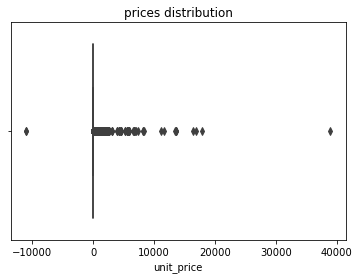

In [48]:
sns.boxplot(df.unit_price)
plt.title('prices distribution')
plt.show()

/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:2857: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


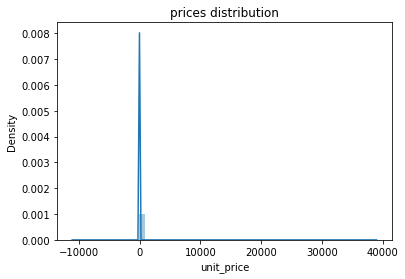

In [49]:
sns.distplot(df.unit_price)
plt.title('prices distribution')
plt.show()

In [50]:
df.query(" unit_price < -100 ")

invoice_no stock_code      description  quantity        invoice_date  \
299983    a563186          b  adjust bad debt         1 2019-08-10 14:51:00   
299984    a563187          b  adjust bad debt         1 2019-08-10 14:52:00   

        unit_price  customer_id  
299983   -11062.06          NaN  
299984   -11062.06          NaN

In [51]:
df.query(" unit_price > 500 ").description.unique()

array(['dotcom postage', 'manual', 'amazon fee', 'bank charges',
       'discount', 'postage', 'picnic basket wicker 60 pieces', 'samples',
       'adjust bad debt', 'cruk commission'], dtype=object)

In [52]:
df.query(" unit_price > 50 ").description.unique()

array(['rustic  seventeen drawer sideboard',
       'chalkboard kitchen organiser', 'dotcom postage',
       'cabin bag vintage paisley', 'vintage post office cabinet',
       'vintage red kitchen cabinet', 'set/4 white retro storage cubes ',
       'manual', 'bank charges', 'samples', 'discount', 'amazon fee',
       'regency mirror with shutters', 'love seat antique white metal',
       'vintage blue kitchen cabinet', 'school desk and chair ',
       'chest natural wood 20 drawers', 'carriage',
       'decorative hanging shelving unit', 'hall cabinet with 3 drawers',
       'medina stamped metal stool', 'postage',
       'silver roccoco chandelier', 'sweetheart cream steel table rect',
       'cabin bag vintage retrospot', 'picnic basket wicker 60 pieces',
       'steel sweetheart round table cream', 'brocade ring purse ',
       'cinderella chandelier ', 'ivory embroidered quilt ',
       'dotcomgiftshop gift voucher £100.00', 'adjust bad debt',
       'cruk commission'], dtype=obje

In [53]:
descriptions_to_exclude = ['dotcom postage','samples','manual','discount','amazon fee','postage','bank charges',
                           'amazon', 'cruk commission', 'adjust bad debt' ]

I will drop all the rows with description not related to actual sold items.

In [54]:
# Create the boolean mask
mask = ~df['description'].isin(descriptions_to_exclude)

# Apply the mask to the DataFrame
df = df[mask]

/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


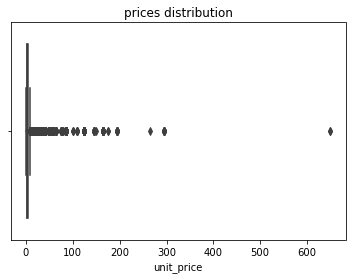

In [55]:
sns.boxplot(df.unit_price)
plt.title('prices distribution')
plt.show()

In [56]:
df.query(" unit_price > 500 ").description.unique()

array(['picnic basket wicker 60 pieces'], dtype=object)

In [57]:
df.query(" unit_price > 100 ").description.unique()

array(['rustic  seventeen drawer sideboard',
       'vintage red kitchen cabinet', 'regency mirror with shutters',
       'love seat antique white metal', 'vintage blue kitchen cabinet',
       'chest natural wood 20 drawers', 'carriage',
       'picnic basket wicker 60 pieces'], dtype=object)

In [58]:
df.query("description == 'picnic basket wicker 60 pieces'")

invoice_no stock_code                     description  quantity  \
222680     556444      22502  picnic basket wicker 60 pieces        60   
222682     556446      22502  picnic basket wicker 60 pieces         1   

              invoice_date  unit_price  customer_id  
222680 2019-06-08 15:28:00       649.5      15098.0  
222682 2019-06-08 15:33:00       649.5      15098.0

The price might seem a bit high, for someone to purchase 60 units of this item, but I don't have enough information about the store. It might be important for the data, I will not treat it as an outlier to drop.

Let's see the distribution of the purchased quantity:

/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


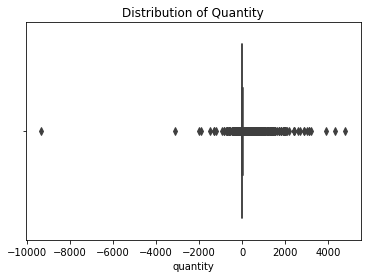

In [59]:
sns.boxplot(df.quantity)
plt.title('Distribution of Quantity')
plt.show()

/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/maurodardanelli/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:2857: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  pct = percentile_func(x, rng, axis=axis, interpolation=interpolation,


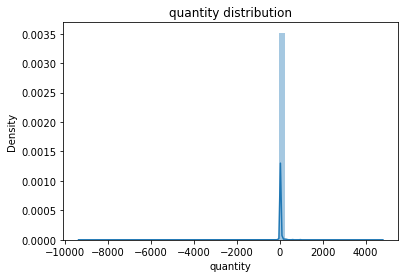

In [60]:
sns.distplot(df.quantity)
plt.title('quantity distribution')
plt.show()

Also here there's quite a skewed data. Let's see how can I clean it:

In [61]:
df.query(" quantity < -100 ").sort_values(by='quantity').head(25)

invoice_no stock_code                          description  quantity  \
4287      c536757      84347  rotating silver angels t-light hldr     -9360   
160145    c550456      21108   fairy cake flannel assorted colour     -3114   
160144    c550456      21175          gin + tonic diet metal sign     -2000   
160143    c550456     85123a   white hanging heart t-light holder     -1930   
224419    c556522      22920                    herb marker basil     -1515   
160142    c550456     47566b               tea time party bunting     -1300   
390544    c570556      20971     pink blue felt craft trinket box     -1296   
377448    c569552      15034          paper pocket traveling fan      -1200   
182728    c552568      84077    world war 2 gliders asstd designs      -960   
390543    c570556      22147           feltcraft butterfly hearts      -840   
304430    c563577      21877                  home sweet home mug      -828   
349750    c567527      23113                pantry chopping board      -756   
414136    c572343      22102        mirror mosaic t-light holder       -720   
390547    c570556      22273                 feltcraft doll molly      -720   
390541    c570556      22273                 feltcraft doll molly      -720   
304432    c563577      21069            vintage billboard tea mug      -701   
160141    c550456      48185                   doormat fairy cake      -670   
144190    c548731      22328   round snack boxes set of 4 fruits       -624   
77073     c542693      15036            assorted colours silk fan      -600   
390542    c570556      22149           feltcraft 6 flower friends      -600   
244799    c558553      23170             regency tea plate roses       -576   
304431    c563577      21871                  save the planet mug      -576   
34292     c539329     85123a   white hanging heart t-light holder      -500   
234363    c557508      23167       small ceramic top storage jar       -480   
414135    c572343      22103   mirror mosaic t-light holder round      -468   

              invoice_date  unit_price  customer_id  
4287   2018-11-30 14:23:00        0.03      15838.0  
160145 2019-04-16 13:08:00        2.10      15749.0  
160144 2019-04-16 13:08:00        1.85      15749.0  
160143 2019-04-16 13:08:00        2.55      15749.0  
224419 2019-06-11 11:21:00        0.55      16938.0  
160142 2019-04-16 13:08:00        2.55      15749.0  
390544 2019-10-09 11:10:00        1.06      16029.0  
377448 2019-10-02 17:44:00        0.07      14533.0  
182728 2019-05-08 12:04:00        0.21      12901.0  
390543 2019-10-09 11:10:00        1.25      16029.0  
304430 2019-08-15 15:06:00        1.06      17949.0  
349750 2019-09-19 09:16:00        5.06      17450.0  
414136 2019-10-22 10:40:00        0.39      14607.0  
390547 2019-10-09 11:10:00        2.55      16029.0  
390541 2019-10-09 11:10:00        2.30      16029.0  
304432 2019-08-15 15:06:00        1.06      17949.0  
160141 2019-04-16 13:08:00        6.75      15749.0  
144190 2019-04-02 10:12:00        2.55      12755.0  
77073  2019-01-29 12:36:00        0.65      12908.0  
390542 2019-10-09 11:10:00        1.85      16029.0  
244799 2019-06-28 12:44:00        1.45      17949.0  
304431 2019-08-15 15:06:00        1.06      17949.0  
34292  2018-12-15 09:37:00        2.55      16013.0  
234363 2019-06-18 16:13:00        0.69      16684.0  
414135 2019-10-22 10:40:00        0.39      14607.0

In [62]:
df.query(" quantity > 100 ").sort_values(by='quantity',ascending=False).head(25)

invoice_no stock_code                          description  quantity  \
421632     573008      84077    world war 2 gliders asstd designs      4800   
206121     554868      22197                 small popcorn holder      4300   
97432      544612      22053                empire design rosette      3906   
270885     560599      18007  essential balm 3.5g tin in envelope      3186   
52711      540815      21108   fairy cake flannel assorted colour      3114   
160546     550461      21108   fairy cake flannel assorted colour      3114   
433788     573995      16014          small chinese style scissor      3000   
291249     562439      84879        assorted colour bird ornament      2880   
4945       536830      84077    world war 2 gliders asstd designs      2880   
201149     554272      21977   pack of 60 pink paisley cake cases      2700   
80742      543057      84077    world war 2 gliders asstd designs      2592   
32671      539101      22693   grow a flytrap or sunflower in tin      2400   
87631      543669      22693   grow a flytrap or sunflower in tin      2400   
91772      544152      18007  essential balm 3.5g tin in envelope      2400   
421601     573003      23084                   rabbit night light      2400   
125282     547037      21967             pack of 12 skull tissues      2160   
437480     574294      21915               red  harmonica in box       2100   
511421     579498      23084                   rabbit night light      2040   
311391     564272      16014          small chinese style scissor      2000   
160545     550461      21175          gin + tonic diet metal sign      2000   
52710      540815      21175          gin + tonic diet metal sign      2000   
177702     552172      16014          small chinese style scissor      2000   
424310     573261      22197                       popcorn holder      1992   
348318     567423      23285             pink vintage spot beaker      1944   
348317     567423      23288            green vintage spot beaker      1944   

              invoice_date  unit_price  customer_id  
421632 2019-10-25 12:26:00        0.21      12901.0  
206121 2019-05-25 10:52:00        0.72      13135.0  
97432  2019-02-20 10:43:00        0.82      18087.0  
270885 2019-07-17 17:04:00        0.06      14609.0  
52711  2019-01-09 12:55:00        2.10      15749.0  
160546 2019-04-16 13:20:00        2.10      15749.0  
433788 2019-10-31 11:24:00        0.32      16308.0  
291249 2019-08-02 18:06:00        1.45      12931.0  
4945   2018-11-30 17:38:00        0.18      16754.0  
201149 2019-05-21 13:08:00        0.42      12901.0  
80742  2019-02-01 10:50:00        0.21      16333.0  
32671  2018-12-14 10:35:00        0.94      16029.0  
87631  2019-02-09 11:22:00        0.94      16029.0  
91772  2019-02-14 12:10:00        0.06      14609.0  
421601 2019-10-25 12:11:00        2.08      14646.0  
125282 2019-03-18 10:37:00        0.25      14101.0  
437480 2019-11-01 15:47:00        1.06      16333.0  
511421 2019-11-27 15:52:00        1.79      12798.0  
311391 2019-08-22 10:52:00        0.32      16308.0  
160545 2019-04-16 13:20:00        1.69      15749.0  
52710  2019-01-09 12:55:00        1.85      15749.0  
177702 2019-05-04 13:03:00        0.32      16308.0  
424310 2019-10-26 12:32:00        0.72      17949.0  
348318 2019-09-18 11:05:00        1.08      17450.0  
348317 2019-09-18 11:05:00        1.08      17450.0

So, it seem that there are many bulk buyers, so I don't have a reason to drop rows with very high quantity. I will just drop one row of a return that seem very odd compared to the rest of data:

In [63]:
df.query("stock_code == '84347'").sort_values(by='quantity', ascending=True).head(25)

invoice_no stock_code                          description  quantity  \
4287      c536757      84347  rotating silver angels t-light hldr     -9360   
11511     c537251      84347  rotating silver angels t-light hldr        -9   
44303     c540164      84347  rotating silver angels t-light hldr        -6   
414618    c572473      84347  rotating silver angels t-light hldr        -1   
92604      544201      84347  rotating silver angels t-light hldr         1   
99365      544768      84347  rotating silver angels t-light hldr         1   
99417      544770      84347  rotating silver angels t-light hldr         1   
99440      544771      84347  rotating silver angels t-light hldr         1   
103765     545078      84347  rotating silver angels t-light hldr         1   
105268     545217      84347  rotating silver angels t-light hldr         1   
414162     572350      84347  rotating silver angels t-light hldr         1   
111291     545716      84347  rotating silver angels t-light hldr         1   
111363     545717      84347  rotating silver angels t-light hldr         1   
120195     546649      84347  rotating silver angels t-light hldr         1   
160412     550458      84347  rotating silver angels t-light hldr         1   
383999     570096      84347  rotating silver angels t-light hldr         1   
162572     550512      84347  rotating silver angels t-light hldr         1   
493232     578211      84347  rotating silver angels t-light hldr         1   
106255     545317      84347  rotating silver angels t-light hldr         1   
87823      543732      84347  rotating silver angels t-light hldr         1   
82410      543201      84347  rotating silver angels t-light hldr         1   
82359      543200      84347  rotating silver angels t-light hldr         1   
495579     578308      84347  rotating silver angels t-light hldr         1   
46543      540355      84347  rotating silver angels t-light hldr         1   
53801      540848      84347  rotating silver angels t-light hldr         1   

              invoice_date  unit_price  customer_id  
4287   2018-11-30 14:23:00        0.03      15838.0  
11511  2018-12-04 10:45:00        2.55          NaN  
44303  2019-01-03 12:02:00        2.55      14911.0  
414618 2019-10-22 13:34:00        2.55      18188.0  
92604  2019-02-15 10:11:00        5.79          NaN  
99365  2019-02-21 11:10:00        5.79          NaN  
99417  2019-02-21 11:11:00        5.79          NaN  
99440  2019-02-21 11:12:00        5.79          NaN  
103765 2019-02-26 10:15:00        4.96          NaN  
105268 2019-02-26 16:59:00        4.96          NaN  
414162 2019-10-22 11:33:00        2.55      15516.0  
111291 2019-03-05 10:15:00        5.79          NaN  
111363 2019-03-05 10:15:00        5.79          NaN  
120195 2019-03-13 14:17:00        5.79          NaN  
160412 2019-04-16 13:13:00        4.96          NaN  
383999 2019-10-05 11:58:00        2.55      15311.0  
162572 2019-04-16 16:31:00        2.55      18069.0  
493232 2019-11-21 11:47:00        2.55      12748.0  
106255 2019-02-27 14:14:00        5.79          NaN  
87823  2019-02-09 12:02:00        5.79          NaN  
82410  2019-02-02 13:03:00        5.79          NaN  
82359  2019-02-02 13:03:00        5.79          NaN  
495579 2019-11-21 16:09:00        2.55      12748.0  
46543  2019-01-04 15:11:00        5.91          NaN  
53801  2019-01-10 09:26:00        5.06          NaN

In [64]:
df = df[df.invoice_no != 'c536757']

In [65]:
df.query("customer_id == 15749.0").sort_values(by='quantity')

invoice_no stock_code                         description  quantity  \
160145    c550456      21108  fairy cake flannel assorted colour     -3114   
160144    c550456      21175         gin + tonic diet metal sign     -2000   
160143    c550456     85123a  white hanging heart t-light holder     -1930   
160142    c550456     47566b              tea time party bunting     -1300   
160141    c550456      48185                  doormat fairy cake      -670   
52772      540818      48185                  doormat fairy cake       670   
160544     550461      48185                  doormat fairy cake       670   
52771      540818     47556b                tea time tea towels       1300   
160543     550461     47556b                tea time tea towels       1300   
52709      540815     85123a  white hanging heart t-light holder      1930   
160542     550461     85123a  white hanging heart t-light holder      1930   
52710      540815      21175         gin + tonic diet metal sign      2000   
160545     550461      21175         gin + tonic diet metal sign      2000   
52711      540815      21108  fairy cake flannel assorted colour      3114   
160546     550461      21108  fairy cake flannel assorted colour      3114   

              invoice_date  unit_price  customer_id  
160145 2019-04-16 13:08:00        2.10      15749.0  
160144 2019-04-16 13:08:00        1.85      15749.0  
160143 2019-04-16 13:08:00        2.55      15749.0  
160142 2019-04-16 13:08:00        2.55      15749.0  
160141 2019-04-16 13:08:00        6.75      15749.0  
52772  2019-01-09 12:57:00        6.75      15749.0  
160544 2019-04-16 13:20:00        6.35      15749.0  
52771  2019-01-09 12:57:00        2.55      15749.0  
160543 2019-04-16 13:20:00        2.10      15749.0  
52709  2019-01-09 12:55:00        2.55      15749.0  
160542 2019-04-16 13:20:00        2.40      15749.0  
52710  2019-01-09 12:55:00        1.85      15749.0  
160545 2019-04-16 13:20:00        1.69      15749.0  
52711  2019-01-09 12:55:00        2.10      15749.0  
160546 2019-04-16 13:20:00        2.10      15749.0

This customer clearly made a mistake: purchased twice of the same 5 items and amounts, then canceled them in one invoice. This data is not relevant to my study, so I will drop some rows, containing one invoice of the purchase and one of the cancellation:

In [66]:
to_drop = ['c550456', '550461']
df = df[~df['invoice_no'].isin(to_drop)]

In [67]:
df.describe()

quantity     unit_price    customer_id
count  531367.000000  531367.000000  399778.000000
mean        9.975973       3.306162   15288.541618
std        37.635464       4.581693    1710.610923
min     -1515.000000       0.001000   12347.000000
25%         1.000000       1.250000   13959.000000
50%         3.000000       2.080000   15151.000000
75%        10.000000       4.130000   16791.000000
max      4800.000000     649.500000   18287.000000

In [68]:
df.query(" quantity < -100 ").sort_values(by='quantity').head(25)

invoice_no stock_code                         description  quantity  \
224419    c556522      22920                   herb marker basil     -1515   
390544    c570556      20971    pink blue felt craft trinket box     -1296   
377448    c569552      15034         paper pocket traveling fan      -1200   
182728    c552568      84077   world war 2 gliders asstd designs      -960   
390543    c570556      22147          feltcraft butterfly hearts      -840   
304430    c563577      21877                 home sweet home mug      -828   
349750    c567527      23113               pantry chopping board      -756   
390547    c570556      22273                feltcraft doll molly      -720   
390541    c570556      22273                feltcraft doll molly      -720   
414136    c572343      22102       mirror mosaic t-light holder       -720   
304432    c563577      21069           vintage billboard tea mug      -701   
144190    c548731      22328  round snack boxes set of 4 fruits       -624   
77073     c542693      15036           assorted colours silk fan      -600   
390542    c570556      22149          feltcraft 6 flower friends      -600   
244799    c558553      23170            regency tea plate roses       -576   
304431    c563577      21871                 save the planet mug      -576   
34292     c539329     85123a  white hanging heart t-light holder      -500   
234363    c557508      23167      small ceramic top storage jar       -480   
414135    c572343      22103  mirror mosaic t-light holder round      -468   
155143    c549968      22151           place setting white heart      -432   
319911    c564940      22564              alphabet stencil craft      -432   
289134    c562221      22151           place setting white heart      -432   
228323    c556925      71477   colour glass. star t-light holder      -420   
255423    c559345      21439                basket of toadstools      -408   
319915    c564940      22992              revolver wooden ruler       -400   

              invoice_date  unit_price  customer_id  
224419 2019-06-11 11:21:00        0.55      16938.0  
390544 2019-10-09 11:10:00        1.06      16029.0  
377448 2019-10-02 17:44:00        0.07      14533.0  
182728 2019-05-08 12:04:00        0.21      12901.0  
390543 2019-10-09 11:10:00        1.25      16029.0  
304430 2019-08-15 15:06:00        1.06      17949.0  
349750 2019-09-19 09:16:00        5.06      17450.0  
390547 2019-10-09 11:10:00        2.55      16029.0  
390541 2019-10-09 11:10:00        2.30      16029.0  
414136 2019-10-22 10:40:00        0.39      14607.0  
304432 2019-08-15 15:06:00        1.06      17949.0  
144190 2019-04-02 10:12:00        2.55      12755.0  
77073  2019-01-29 12:36:00        0.65      12908.0  
390542 2019-10-09 11:10:00        1.85      16029.0  
244799 2019-06-28 12:44:00        1.45      17949.0  
304431 2019-08-15 15:06:00        1.06      17949.0  
34292  2018-12-15 09:37:00        2.55      16013.0  
234363 2019-06-18 16:13:00        0.69      16684.0  
414135 2019-10-22 10:40:00        0.39      14607.0  
155143 2019-04-11 14:24:00        0.36      14064.0  
319911 2019-08-29 13:10:00        1.06      12931.0  
289134 2019-08-01 14:22:00        0.36      16525.0  
228323 2019-06-13 14:23:00        2.75      16013.0  
255423 2019-07-05 17:16:00        1.06      13984.0  
319915 2019-08-29 13:10:00        1.65      12931.0

I think the data is now fairly clean, so i can proceed with EDA, but first I will adda column 'sales', containing the total price paid:


In [69]:
df['sales']=df['quantity']*df['unit_price']

## EDA

Exploratory Data Analysis is the process of exploring data, generating insights, checking assumptions and revealing underlying hidden patterns in the data. Analyze and investigate data sets and summarize their main characteristics
the crucial steps to go through will be:
group and sort data in order to have a first view on trends: visualize trends and distributions, most popular Item, least popular Item
lemmatization to divide products into categories

Let's take a look at orders on a monthly basis:

In [70]:
df_monthly_orders = df.set_index('invoice_date')['invoice_no'].resample('M').nunique().reset_index()
df_monthly_orders

invoice_date  invoice_no
0    2018-11-30         295
1    2018-12-31        1556
2    2019-01-31        1471
3    2019-02-28        1266
4    2019-03-31        1680
5    2019-04-30        1387
6    2019-05-31        2054
7    2019-06-30        1744
8    2019-07-31        1732
9    2019-08-31        1639
10   2019-09-30        1992
11   2019-10-31        2469
12   2019-11-30        3251
13   2019-12-31         655

In [71]:
df_monthly_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  14 non-null     datetime64[ns]
 1   invoice_no    14 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 352.0 bytes


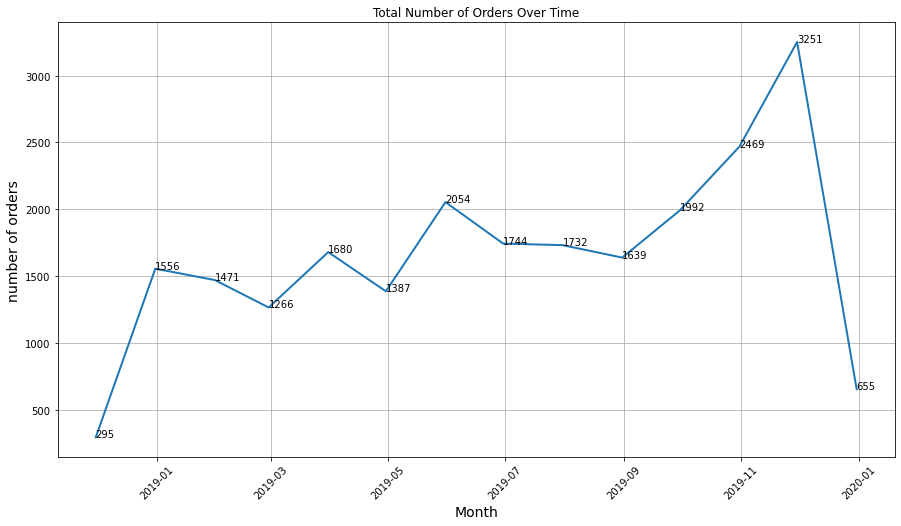

In [72]:
rcParams['figure.figsize'] = 15,8
ax = sns.lineplot(x='invoice_date', y='invoice_no', data=df_monthly_orders, linewidth =2)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('number of orders', fontsize=14)
ax.set_title('Total Number of Orders Over Time')
plt.grid(True)
plt.xticks( rotation=45 )

# label points on the plot
for x, y in zip(df_monthly_orders['invoice_date'], df_monthly_orders['invoice_no']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y, # y-coordinate position of data label,
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'black') # set colour of line


plt.show()




#### The demand for items clearly seen a rapid rise around the winter_christmas season.

let's look at orders on a weekly basis:

In [73]:
df_weekly_orders = df.set_index('invoice_date')['invoice_no'].resample('W').nunique().reset_index()
df_weekly_orders

invoice_date  invoice_no
0    2018-12-02         370
1    2018-12-09         663
2    2018-12-16         584
3    2018-12-23         234
4    2018-12-30           0
5    2019-01-06         242
6    2019-01-13         338
7    2019-01-20         277
8    2019-01-27         359
9    2019-02-03         363
10   2019-02-10         289
11   2019-02-17         332
12   2019-02-24         319
13   2019-03-03         336
14   2019-03-10         379
15   2019-03-17         347
16   2019-03-24         399
17   2019-03-31         437
18   2019-04-07         354
19   2019-04-14         419
20   2019-04-21         368
21   2019-04-28         226
22   2019-05-05         371
23   2019-05-12         517
24   2019-05-19         484
25   2019-05-26         476
26   2019-06-02         275
27   2019-06-09         494
28   2019-06-16         412
29   2019-06-23         438
30   2019-06-30         351
31   2019-07-07         412
32   2019-07-14         349
33   2019-07-21         411
34   2019-07-28         414
35   2019-08-04         371
36   2019-08-11         328
37   2019-08-18         353
38   2019-08-25         409
39   2019-09-01         324
40   2019-09-08         414
41   2019-09-15         485
42   2019-09-22         500
43   2019-09-29         557
44   2019-10-06         583
45   2019-10-13         517
46   2019-10-20         504
47   2019-10-27         539
48   2019-11-03         603
49   2019-11-10         744
50   2019-11-17         779
51   2019-11-24         722
52   2019-12-01         765
53   2019-12-08         655

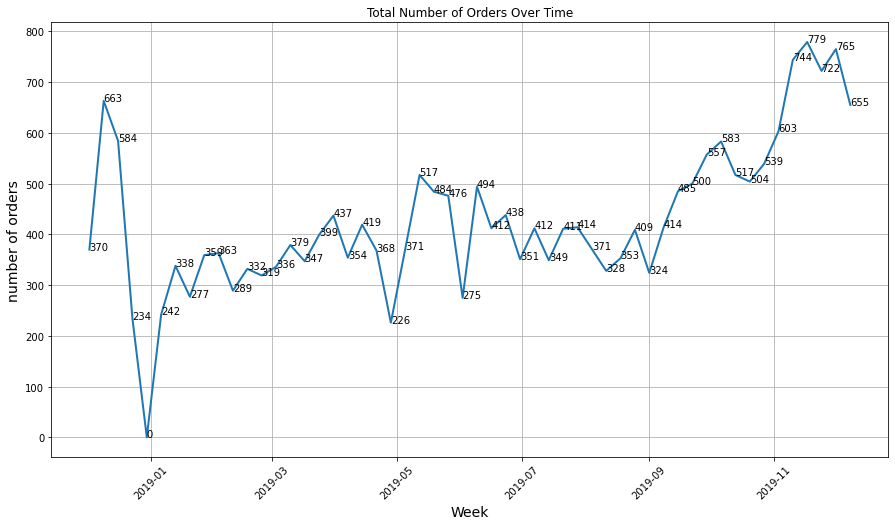

In [74]:
rcParams['figure.figsize'] = 15,8
ax = sns.lineplot(x='invoice_date', y='invoice_no', data=df_weekly_orders, linewidth = 2)
ax.set_xlabel('Week', fontsize=14)
ax.set_ylabel('number of orders', fontsize=14)
ax.set_title('Total Number of Orders Over Time')
plt.grid(True)
plt.xticks( rotation=45 )

# label points on the plot
for x, y in zip(df_weekly_orders['invoice_date'], df_weekly_orders['invoice_no']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y, # y-coordinate position of data label,
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'black') # set colour of line

plt.show()

In the last few days of 2018 there has been a heavy drop of purchases, down to 0. it's worth to see why that happened. Maybe there was a technical problem on the website.

Besides that, the weekly trend looks very much like the monthly trend, with a clear increase of purchases around Christmas.

Now, it's time to see the trends of revenues, in terms of ***cumulative monthly revenue***:

In [75]:
df_monthly_revenue = df.set_index('invoice_date')['sales'].resample('M').sum().reset_index()

In [76]:
display(df_monthly_revenue)

invoice_date        sales
0    2018-11-30   103530.720
1    2018-12-31   655517.170
2    2019-01-31   626963.610
3    2019-02-28   494409.010
4    2019-03-31   661057.200
5    2019-04-30   467291.311
6    2019-05-31   775759.960
7    2019-06-30   686052.870
8    2019-07-31   711411.571
9    2019-08-31   731660.140
10   2019-09-30   947300.001
11   2019-10-31  1123518.210
12   2019-11-30  1461070.740
13   2019-12-31   335190.760

In [77]:
df_monthly_revenue['invoice_month'] = df_monthly_revenue['invoice_date'].dt.strftime('%B %Y')

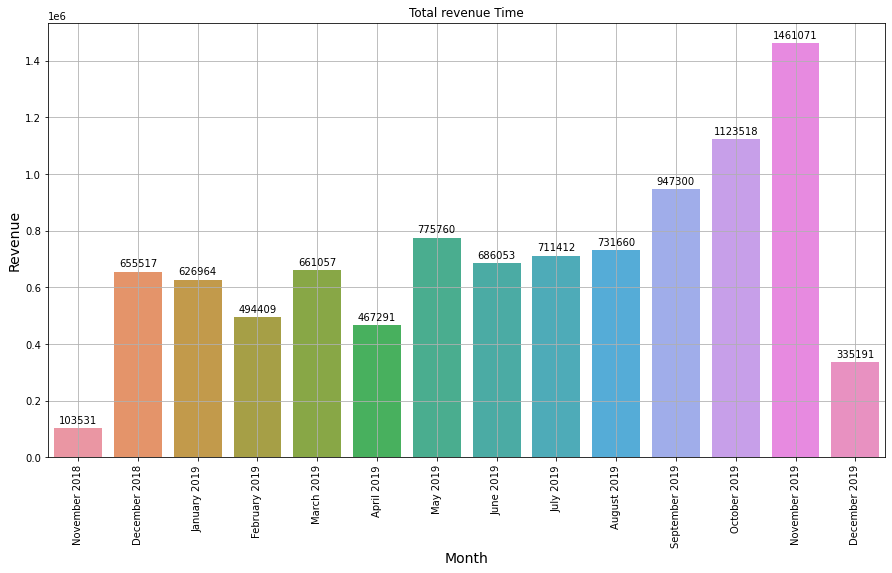

In [78]:
rcParams['figure.figsize'] = 15,8
ax = sns.barplot(x='invoice_month', y='sales', data=df_monthly_revenue, linewidth = 2)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Revenue', fontsize=14)
ax.set_title('Total revenue Time')

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.grid(True)
plt.xticks( rotation= 90)
plt.show()

The revenues in November were the highest.

Due to the fact that we have multiple records for one purchase order (InvoiceNo), we have to aggregate data for each order, so that one record in the dataset represents one purchase order.

Now we can see if every month there are customers who repeteadly buy in the store :


In [79]:

df_invoice_customer = df.groupby(
    by=['invoice_no', 'invoice_date', 'customer_id']
).agg({
    'sales': sum,
    
}).reset_index()


df_invoice_customer.head()

invoice_no        invoice_date  customer_id   sales
0     536365 2018-11-29 08:26:00      17850.0  139.12
1     536366 2018-11-29 08:28:00      17850.0   22.20
2     536367 2018-11-29 08:34:00      13047.0  278.73
3     536368 2018-11-29 08:34:00      13047.0   70.05
4     536369 2018-11-29 08:35:00      13047.0   17.85

In [80]:
df_monthly_repeat_customers = df_invoice_customer.set_index('invoice_date').groupby([
    pd.Grouper(freq='M'), 'customer_id'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['customer_id']

# Create dataframe from output
df_monthly_repeat_customers = pd.DataFrame(df_monthly_repeat_customers).reset_index()
df_monthly_repeat_customers = df_monthly_repeat_customers.rename(columns={'customer_id':'repeat_customer_count'})

# Extract month (numeric and advertised) and year 
df_monthly_repeat_customers['month'] = df_monthly_repeat_customers['invoice_date'].dt.month

In [81]:
display(df_monthly_repeat_customers)

invoice_date  repeat_customer_count  month
0    2018-11-30                     35     11
1    2018-12-31                    299     12
2    2019-01-31                    281      1
3    2019-02-28                    237      2
4    2019-03-31                    300      3
5    2019-04-30                    251      4
6    2019-05-31                    422      5
7    2019-06-30                    319      6
8    2019-07-31                    326      7
9    2019-08-31                    307      8
10   2019-09-30                    366      9
11   2019-10-31                    468     10
12   2019-11-30                    690     11
13   2019-12-31                     82     12

In [82]:
df_monthly_unique_customers = df_invoice_customer.set_index('invoice_date')['customer_id'].resample('M').nunique()


df_monthly_unique_customers = pd.DataFrame(df_monthly_unique_customers).reset_index()
df_monthly_unique_customers = df_monthly_unique_customers.rename(columns={'customer_id':'customer_count_unique'})

# Extract month (numeric and advertised) and year 
df_monthly_unique_customers['month'] = df_monthly_unique_customers['invoice_date'].dt.month

In [83]:
display(df_monthly_unique_customers)

invoice_date  customer_count_unique  month
0    2018-11-30                    203     11
1    2018-12-31                    835     12
2    2019-01-31                    847      1
3    2019-02-28                    780      2
4    2019-03-31                    999      3
5    2019-04-30                    868      4
6    2019-05-31                   1106      5
7    2019-06-30                   1013      6
8    2019-07-31                   1012      7
9    2019-08-31                    982      8
10   2019-09-30                   1252      9
11   2019-10-31                   1491     10
12   2019-11-30                   1724     11
13   2019-12-31                    503     12

Calculate percentage of repeat customers:

In [84]:
df_monthly_repeat_percentage = df_monthly_repeat_customers['repeat_customer_count']/df_monthly_unique_customers['customer_count_unique']*100.0

df_monthly_repeat_percentage = pd.DataFrame(df_monthly_repeat_percentage).reset_index().drop(["index"], axis = 1)

# Add according InvoiceDate from one of the previous created dataframes
df_monthly_repeat_percentage['invoice_date'] = df_monthly_unique_customers['invoice_date']


# Rearrange Columns
cols = list(df_monthly_repeat_percentage.columns)
cols = [cols[-1]] + cols[:-1]
df_monthly_repeat_percentage = df_monthly_repeat_percentage[cols]

# Rename Columns
df_monthly_repeat_percentage.columns = ['invoice_date','repeat_percentage']



In [85]:
display(df_monthly_repeat_percentage)

invoice_date  repeat_percentage
0    2018-11-30          17.241379
1    2018-12-31          35.808383
2    2019-01-31          33.175915
3    2019-02-28          30.384615
4    2019-03-31          30.030030
5    2019-04-30          28.917051
6    2019-05-31          38.155515
7    2019-06-30          31.490622
8    2019-07-31          32.213439
9    2019-08-31          31.262729
10   2019-09-30          29.233227
11   2019-10-31          31.388330
12   2019-11-30          40.023202
13   2019-12-31          16.302187

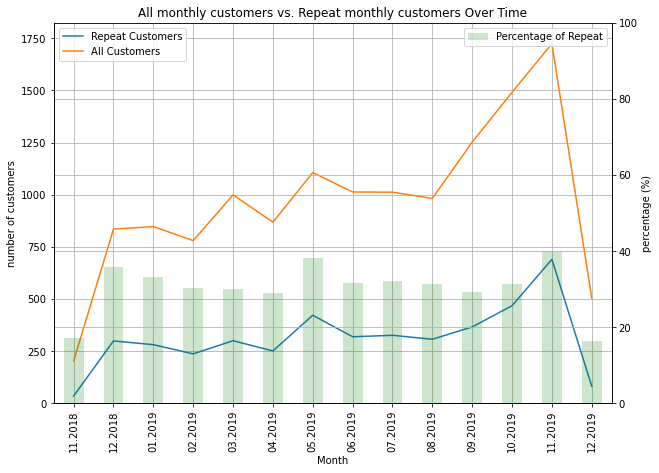

In [86]:
ax = pd.DataFrame(df_monthly_repeat_customers['repeat_customer_count'].values).plot(
    figsize=(10,7)
)

pd.DataFrame(df_monthly_unique_customers['customer_count_unique'].values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(df_monthly_repeat_percentage['repeat_percentage'].values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('Month')
ax.set_ylabel('number of customers')
ax.set_title('All monthly customers vs. Repeat monthly customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, df_monthly_unique_customers['customer_count_unique'].values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(df_monthly_repeat_percentage['invoice_date'])), 
    [x.strftime('%m.%Y') for x in df_monthly_repeat_percentage['invoice_date']], 
    rotation=45
)

plt.show()

The trends of buyers and repeat customers are very similar to each others, and they resemble the trends of purchases and revenues, with a a remarkable growth toward winter-christmas 2019, and way higher peak in winter 2019, than winter 2018.


It's worth to analyze the revenue from repeat customers:

In [87]:
df_monthly_rev_repeat_customers = df_invoice_customer.set_index('invoice_date').groupby([
    pd.Grouper(freq='M'), 'customer_id'
]).filter(lambda x: len(x) > 1).resample('M').sum()['sales']

# Create dataframe from output
df_monthly_rev_repeat_customers = pd.DataFrame(df_monthly_rev_repeat_customers).reset_index()

df_monthly_rev_repeat_customers['month'] = df_monthly_rev_repeat_customers['invoice_date'].dt.month

/var/folders/pt/x9nfkvnn0wd8cjs1l7kttgf40000gp/T/ipykernel_43771/2066774796.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_rev_repeat_customers = df_invoice_customer.set_index('invoice_date').groupby([


In [88]:
display(df_monthly_rev_repeat_customers)

invoice_date      sales  month
0    2018-11-30   38741.85     11
1    2018-12-31  299568.05     12
2    2019-01-31  293941.46      1
3    2019-02-28  216194.99      2
4    2019-03-31  309883.51      3
5    2019-04-30  200783.85      4
6    2019-05-31  446059.39      5
7    2019-06-30  378420.67      6
8    2019-07-31  360615.12      7
9    2019-08-31  401817.83      8
10   2019-09-30  501502.54      9
11   2019-10-31  610057.46     10
12   2019-11-30  776872.98     11
13   2019-12-31  107251.85     12

In [89]:
df_monthly_rev_perc_repeat_customers = df_monthly_rev_repeat_customers['sales']/df_monthly_revenue.sales * 100.0
df_monthly_rev_perc_repeat_customers


# Create dataframe from output
df_monthly_rev_perc_repeat_customers = pd.DataFrame(df_monthly_rev_perc_repeat_customers).reset_index().drop(["index"], axis = 1)

# Add according InvoiceDate from one of the previous created dataframes
df_monthly_rev_perc_repeat_customers['invoice_date'] = df_monthly_rev_repeat_customers['invoice_date']


# Rearrange Columns
cols = list(df_monthly_rev_perc_repeat_customers.columns)
cols = [cols[-1]] + cols[:-1]
df_monthly_rev_perc_repeat_customers = df_monthly_rev_perc_repeat_customers[cols]

# Rename Columns
df_monthly_rev_perc_repeat_customers.columns = ['invoice_date','repeat_cust_rev_percentage']

display(df_monthly_rev_perc_repeat_customers)

invoice_date  repeat_cust_rev_percentage
0    2018-11-30                   37.420632
1    2018-12-31                   45.699497
2    2019-01-31                   46.883337
3    2019-02-28                   43.727963
4    2019-03-31                   46.876959
5    2019-04-30                   42.967598
6    2019-05-31                   57.499667
7    2019-06-30                   55.159112
8    2019-07-31                   50.690084
9    2019-08-31                   54.918644
10   2019-09-30                   52.940203
11   2019-10-31                   54.298849
12   2019-11-30                   53.171483
13   2019-12-31                   31.997257

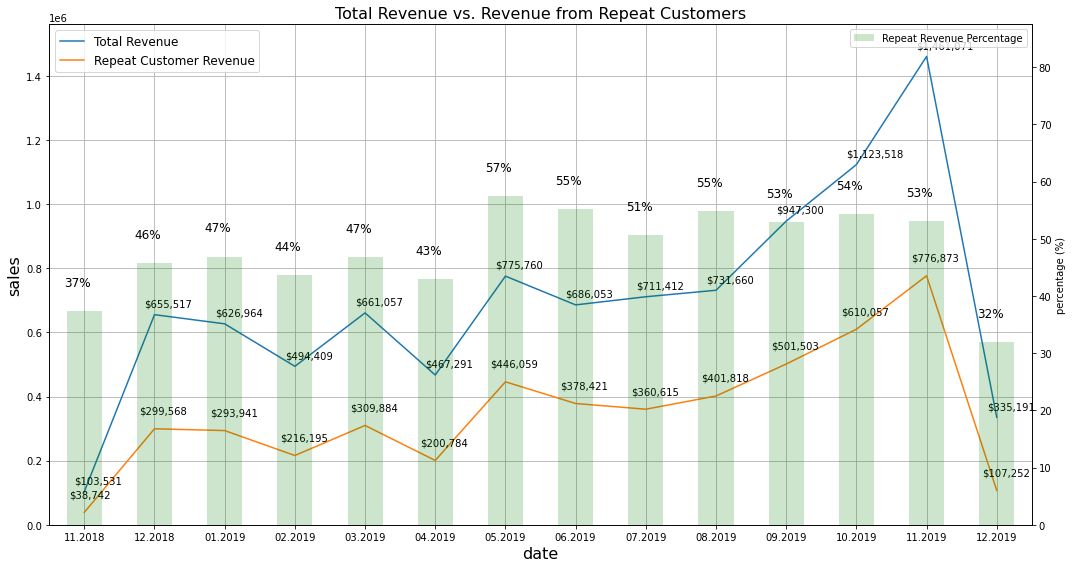

In [90]:
ax = pd.DataFrame(df_monthly_revenue.sales).plot(
    figsize=(15,8))


pd.DataFrame(df_monthly_rev_repeat_customers['sales'].values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date', fontsize=16)
ax.set_ylabel('sales', fontsize=16)
ax.set_title('Total Revenue vs. Revenue from Repeat Customers', fontsize=16)

ax.legend(['Total Revenue', 'Repeat Customer Revenue'], loc='upper left', fontsize=12)


ax.set_ylim([0, max(df_monthly_revenue.sales)+100000])

ax2 = ax.twinx()

pd.DataFrame(df_monthly_rev_perc_repeat_customers['repeat_cust_rev_percentage'].values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)



ax2.set_ylim([0, max(df_monthly_rev_perc_repeat_customers['repeat_cust_rev_percentage'].values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'], loc='upper right',fontsize=10 )

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in df_monthly_rev_perc_repeat_customers['invoice_date']
])

for i, val in enumerate(df_monthly_revenue['sales']):
    ax.annotate('${:,.0f}'.format(val), (i, val), xytext=(-10, 8), textcoords='offset points', fontsize=10)
    
for i, val in enumerate(df_monthly_rev_repeat_customers['sales'].values):
    ax.annotate('${:,.0f}'.format(val), (i, val), xytext=(-15, 15), textcoords='offset points', fontsize=10)
    
for i, val in enumerate(df_monthly_rev_perc_repeat_customers['repeat_cust_rev_percentage'].values):
     ax2.annotate('{:,.0f}%'.format(val), (i, val), xytext=(-20, 25), textcoords='offset points', fontsize=12)
        

        

plt.tight_layout()


plt.show()

The revenues from repeat customers represent a very large piece of the total revenues: they range from 32 to 57%. 

In order to generate some more insights about the products range, I will divide our products into categories. I will use the tecnique of lemmatization, which will help me to understand which kind of products are more or less popular.


In [91]:
df.stock_code.nunique()

3818

In [92]:
print(df['description'].nunique())

4032


some products with different description share the same stock code.

In [93]:
df['description'].value_counts().head(20)

white hanging heart t-light holder    2351
regency cakestand 3 tier              2187
jumbo bag red retrospot               2153
party bunting                         1719
lunch bag red retrospot               1625
assorted colour bird ornament         1488
set of 3 cake tins pantry design      1465
pack of 72 retrospot cake cases       1367
lunch bag  black skull.               1323
natural slate heart chalkboard        1272
jumbo bag pink polkadot               1245
heart of wicker small                 1230
jam making set with jars              1220
jumbo storage bag suki                1211
paper chain kit 50's christmas        1194
jumbo shopper vintage red paisley     1192
lunch bag cars blue                   1185
lunch bag spaceboy design             1177
jam making set printed                1177
recipe box pantry yellow design       1166
Name: description, dtype: int64

This list already gives us an idea of which products are more sold. let's not forget that this includes also cancelled products, so we need to look deper.

I am going to divide the products into categories, using lemmatization: Lemmatization is a process in natural language processing (NLP) that seeks to convert words to their base or dictionary form, known as the lemma. Then i will procced to categorization using a rule_based system.

initiate the lemmatizer:

In [94]:
lemmatizer = WordNetLemmatizer()

In [95]:
def lemmatize_text(text):
    '''Function to lemmatize the text'''
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

In [96]:
# Apply the lemmatize_text function to the text_column in the DataFrame
df['lemmatized_description'] = df['description'].apply(lemmatize_text)

In [97]:
# Concatenate the lemmatized tokens in each row into a single string
df['lemmatized_description'] = df['lemmatized_description'].apply(lambda x: ' '.join(x))

In [98]:
# Generate a word frequency dictionary
word_freq = {}
for text in df['lemmatized_description']:
    tokens = word_tokenize(text)
    for word in tokens:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

The code above generates a word frequency dictionary from a column that contains lemmatized text.

The code first initializes an empty dictionary, "word_freq". Then, for each row in the "lemmatized_description" column, it tokenizes the text into individual words using the "word_tokenize" function from the nltk library.

For each word in the tokenized text, the code checks if the word already exists in the "word_freq" dictionary. If it does, the frequency of that word is incremented by 1. If the word does not exist in the dictionary, a new entry is created with a frequency of 1.

By the end of the loop, the "word_freq" dictionary will contain all the unique words from the "lemmatized_description" column and their corresponding frequency in the text.

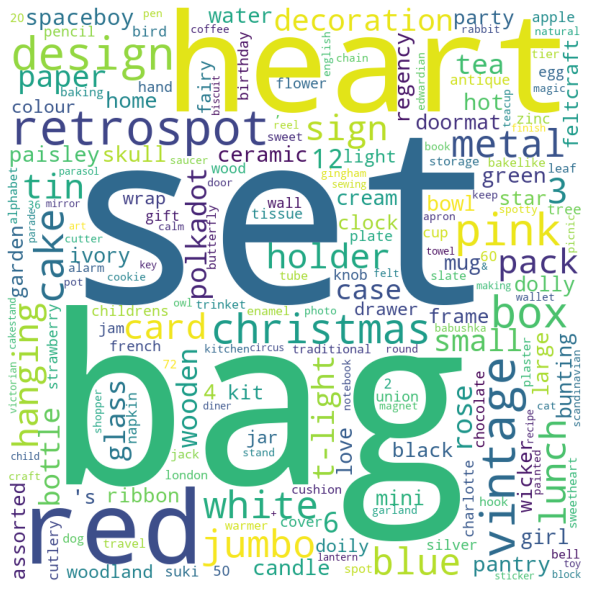

In [99]:
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(word_freq)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Here, I built a graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. We can see that the most frequest words are Bag, Heart, Set, Christmats etc... a lot of these words are adjective or specification of the product, they do not describe the product itself. However, is it possible to understand, which kind of pattern/colours/themes are greatly appreciated by our customers, and based on these observations, give more importance to the preferred colours, when choosing how to restock.


In [100]:
sorted(word_freq.items(), key=lambda item: item[1], reverse=True)

[('set', 53976),
 ('bag', 51802),
 ('heart', 43712),
 ('red', 42992),
 ('retrospot', 34830),
 ('vintage', 33437),
 ('design', 30250),
 ('pink', 29697),
 ('box', 27362),
 ('christmas', 24874),
 ('cake', 22755),
 ('jumbo', 20979),
 ('metal', 20897),
 ('white', 20621),
 ('blue', 19209),
 ('3', 18497),
 ('lunch', 18285),
 ('card', 17284),
 ('sign', 17045),
 ('hanging', 16834),
 ('holder', 16384),
 ('tin', 16232),
 ('pack', 15429),
 ('decoration', 14455),
 ('t-light', 14436),
 ('paper', 14262),
 ('small', 14178),
 ('6', 12990),
 ('wooden', 12590),
 ('polkadot', 12376),
 ('tea', 12310),
 ('glass', 12275),
 ('bottle', 12114),
 ('case', 11968),
 ('rose', 11685),
 ('12', 11262),
 ('spaceboy', 10720),
 ('hot', 10628),
 ('water', 9854),
 ('candle', 9815),
 ('large', 9690),
 ('pantry', 9663),
 ('skull', 9448),
 ('home', 9436),
 ('paisley', 9228),
 ('green', 9063),
 ('ceramic', 9060),
 ('4', 9039),
 ('regency', 9034),
 ('dolly', 8339),
 ('doormat', 8321),
 ('mug', 8318),
 ('girl', 8311),
 ('ivory',

In [101]:

word_frequency_series = pd.Series(word_freq)

sorted_word_frequency = word_frequency_series.sort_values(ascending=False)

sorted_word_frequency.head(30)

set           53976
bag           51802
heart         43712
red           42992
retrospot     34830
vintage       33437
design        30250
pink          29697
box           27362
christmas     24874
cake          22755
jumbo         20979
metal         20897
white         20621
blue          19209
3             18497
lunch         18285
card          17284
sign          17045
hanging       16834
holder        16384
tin           16232
pack          15429
decoration    14455
t-light       14436
paper         14262
small         14178
6             12990
wooden        12590
polkadot      12376
dtype: int64

Sets are a big hit, but everything can be sold as a set, so, that's not very informative. 

Time to define our categories, with rule-based association system.

In [102]:


def categorize_product(description):
    '''This function will divide the products into categories, using the technique of rule-based association'''
    categories = []
    
    # Define a dictionary mapping categories to lists of words
    category_map ={
    'candles and lights': ['candle', 't-light','t-lights','light','lights','led', 'lantern','lanterns',
                           'candleholder', 'chocolatecandle', 'candlestick','lamp','incense/candle',
                           'candlepot', 'nightlight', 'lightbulb', 'candles'],
    'bags': ['bag', 'shopper', 'handbag', 'shopping','purse','backpack'],
    'valentine': ['heart', 'valentine', 'hearts', 'love', 'sweetheart', 'loveheart'],
    'skull' : ['skull', 'skulls'],  
    'London' : ['union''jack', 'union''flag', 'london','united', 'union'],
    'kitchen': ['teapot','tumbler','egg','eggs','placemats','placemat','pot','cake','baking','jam', 'cake', 'tea', 'recipe', 'kitchen',
                'cookie', 'coffee', 'mug','sugar','teaspoon','chopping', 'jar', 'jug','cup','saucer', 'pantry', 'oven',
                'lid', 'dish', 'pan', 'spoon','measuring', 'food', 'popcorn', 'plate','platter','cutlery', 'holder',
                'biscuit','straw','toast','cooking','cook'],
    'kids' : ['child','word','tattoes','tattoo','balloon','chalk','baby','alphabet', 'children','doll', 'soldier', 
              'childrens','teddy','princess', 'dolly', 'girl', 'puzzle', 'circus', 'chalkboard', 'jigsaw', 'toy',
              'boy','globe', 'crayon','girly','toy','horse','clay','teddy','colouring', 'pencils','playhouse', 'ribbons', 'bank',
             'letter','helicopter', 'spaceboy','space','gumball'],
    'home' : ['key','tablecloth','clothes','tins','tin','curtain','peg','chair','hook','tray','quilt','squarecushion','storage','home','doorstop','flask', 'hanging', 'hang', 'mat','doormat', 'frame', 'sticker', 'sheet', 'towel', 'picture', 'hanger', 'clock', 
             'drawer','cabinet', 'storage','crates','drawerknob', 'knob', 'cushion','keys','garage','door', 'doorsign', 
             'tile', 'sign', 'wall','flytrap','throw','pillow', 'knitted'],
    'winter & christmas': ['umbrella','crackers','hot','wreath','warmer', 'hottie', 'christmas', 'cosy', 'santa','coat', 'rain', 'poncho', 'wool', 'jingle'],
    'decorations & gifts': ['decoration', 'napkin', 'napkins', 'card', 'birthday', 'paper', 'shopper','ribbon',
                            'confetti', 'garland', 'party','halloween','gift', 'wrap','place','bunting'],
    'bottles' : ['bottle','bottles'],
    'work' : ['money','notepad','scissor','organiser','ruler', 'pencil', 'calculator', 'notebook', 'book', 'eraser',
              'stationery','passport','vippassport', 'collage', 'pen', 'keepsake','stamp','cardholder',
              'envelope', 'tape', 'case', 'cases','letter rack','bin','wastepaper'],
    'styling': ['fan','badge','brooch','patch','hairclip', 'hair', 'comb', 'glasses', 'neckl', 'bracelet','earrings', 'earring','rings', 'ring', 'brush', 'cosmetic', 
                'lipstick','lip','hairclips','necklace','bangle','bangles','chopstick','jewellery', 'memo', 'writing', 'glove', 'gloves'],
    'bathroom': ['washbag','cream','sponge', 'toothpaste', 'plasters','plaster', 'aid', 'herb', 'tissue','shower' ],
    'free time' : ['journal','board','incense','game', 'playing' 'cards', 'sporty', 'photo', 'mat','sketchbook', 
                   'luggage','radio', 'cocktail', 'sewing','paint','painting','drawing','cigar','bicycle','stencil',
                   'rope','harmonica','spinning','crochet','match','knitting','bingo','postcard', 'ear',
                   'headphones','picnic','charm','pic','passport', 'domino','button','repair','images'],
    'easter' : ['easter'],
    'garden' : ['watering', 'gardeners', 'garden','gardener', 'plant', 'vase','potting','grow'],
    'lunch' : ['lunch','coaster','snack'],
    'knick knack': ['knick', 'knack','knick knack', 'magnet','magnets', 'babushka', 'bowl',
                    'oval','beaker','ornament', 'victorian', 'regency','gnome',
                    'edwardian','disco', 'mirror', 'treasure', 'feltcraft','frame','flying''duck','wicker',
                    'keepsake box', 'wood''box','bell', 'cottage', 'rose', 'keepsake','porcelain','trinket',
                    'basket', 'toadstool','nesting','bird','calendar','pear','pouffe','doily','duck',
                    'print', 'felt', 'artificial', 'decorative','figures','secret','folkart']
        
    
}

    
   # Loop through the words in the description 
    for word in description.split():
        # Loop through the categories in the category_map
        for category, words in category_map.items():
            # Check if the word is in the list of words for this category
            if word in words:
                categories.append(category)
                break
        # Stop checking for matches after the first category is found
        if categories:
            break
    
    # If the list of categories is empty, add the category "Other"
    if not categories:
        categories.append("other")
    
    # Return the list of categories
    return categories







Apply the categorize_product function to each description in the data frame

In [103]:

df['categories'] = df['lemmatized_description'].apply(categorize_product)
df['categories'] = df['categories'].apply(lambda x: x[0] if x else '')

In [104]:
df.query("categories == 'other'").sample(50)


invoice_no stock_code                         description  quantity  \
83298      543300     85185d                    frog sock puppet         3   
497829     578479      22778                  glass cloche small         3   
220883     556237      21454                painted pink rabbit          1   
46816      540364      20828             glitter butterfly clips         1   
298846     563062      22329  round container set of 5 retrospot         2   
294484     562715      85059           french enamel water basin         1   
343312     566949      23318      box of 6 mini vintage crackers         2   
283135     561694      22485       set of 2 wooden market crates         2   
445317     574835      23571       traditional naughts & crosses        24   
312383     564353      23318      box of 6 mini vintage crackers        48   
124587     546983      21686          medina stamped metal stool         1   
111077     545713      21912            vintage snakes & ladders         3   
479362     577157      23318      box of 6 mini vintage crackers        12   
299597     563112      84077   world war 2 gliders asstd designs        48   
331942     566047     82011c  bathroom scales footprints in sand         2   
135138     547882         c2                            carriage         1   
275644     560999      21830            assorted creepy crawlies        12   
182315     552537      21263       green goose feather tree 60cm         2   
155711     550008     84795b                sunset check hammock         2   
108540     545545      21784                     shoe shine box          1   
524131     580529      23319         box of 6 mini 50's crackers         2   
321284     565141     46000u      polyester filler pad 30cmx30cm         1   
135277     547888      21912            vintage snakes & ladders         4   
150888     549525      21455         painted yellow wooden daisy         3   
296689     562928      84077   world war 2 gliders asstd designs        96   
38452     c539576      22939                 apron apple delight       -12   
66967      541827     85188a          green metal swinging bunny         1   
178235     552229      21749        large red retrospot windmill         1   
128120     547250     18094c   white and blue ceramic oil burner         1   
269953     560534      21912            vintage snakes & ladders         4   
486572     577740      23319         box of 6 mini 50's crackers         2   
133090     547722      84077   world war 2 gliders asstd designs        48   
165629     550819      85197  set of 12 mini bunnies in a bucket         2   
159853     550377      22777                  glass cloche large         4   
355265     567915      62018                           sombrero          6   
464275     576083      84077   world war 2 gliders asstd designs       288   
107816     545464      47481     50cm metal string with  7 clips         1   
479317     577155      84077   world war 2 gliders asstd designs        48   
149775     549302      22550                    holiday fun ludo         6   
72884      542272      84077   world war 2 gliders asstd designs        48   
99829      544790      21042                red retrospot apron          3   
99257      544766      22778                  glass cloche small         2   
384829     570180      21912            vintage snakes & ladders         4   
369086     569012      23466               tuscan villa dovecote         2   
97526      544642      20828             glitter butterfly clips         4   
317264     564758      84828   jungle popsicles ice lolly moulds         1   
326907     565612      22548        heads and tails sporting fun        12   
22671      538177      21264      white goose feather tree 60cm          1   
421269     572931      23571       traditional naughts & crosses        12   
494189     578262      23319         box of 6 mini 50's crackers         4   

              invoice_date  

In [105]:
df['categories'].value_counts()

home                   80045
kitchen                71529
knick knack            62616
decorations & gifts    56955
kids                   34597
valentine              33162
bags                   32498
winter & christmas     28626
candles and lights     19685
free time              19315
work                   19227
lunch                  18427
bathroom               15113
other                  10867
styling                 8610
garden                  7666
skull                   5294
London                  3552
bottles                 2025
easter                  1558
Name: categories, dtype: int64

In [106]:
df.categories.unique()

array(['home', 'candles and lights', 'bathroom', 'winter & christmas',
       'knick knack', 'kids', 'kitchen', 'valentine',
       'decorations & gifts', 'lunch', 'bags', 'free time', 'work',
       'skull', 'other', 'garden', 'bottles', 'London', 'styling',
       'easter'], dtype=object)

In [107]:
categories= df.groupby('categories')['quantity'].count().reset_index().sort_values(by='quantity', ascending=False)

In [108]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 9 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   categories  20 non-null     object
 1   quantity    20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


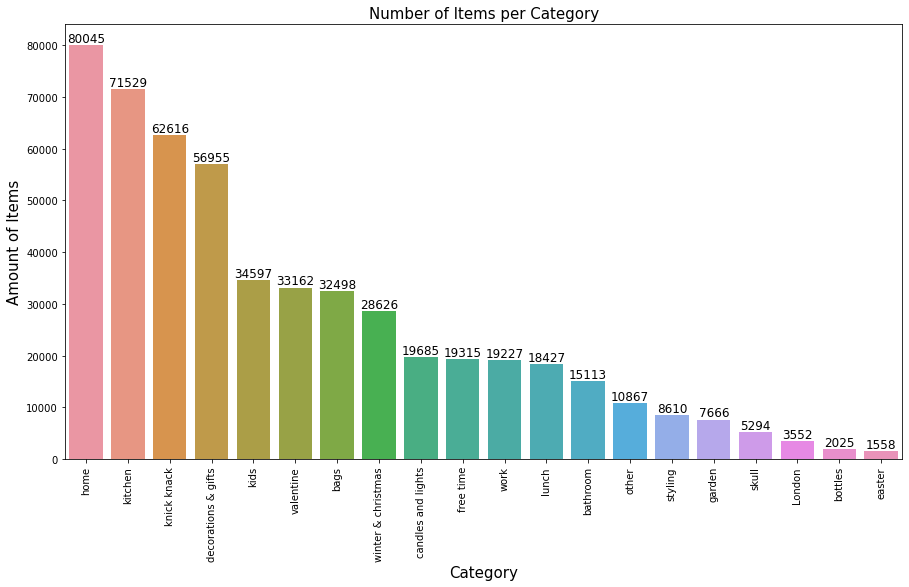

In [109]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='categories', y='quantity', data=categories)
plt.xticks(rotation=90)
ax.set_title('Number of Items per Category', fontdict={'size': 15})
ax.set_xlabel("Category", fontdict={'size': 15})
ax.set_ylabel("Amount of Items", fontdict={'size': 15})

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), 
            ha='center', va='bottom', fontsize=12)

plt.show()

In [110]:
products = df.pivot_table(index = ['categories', 'description'], values = 'quantity', aggfunc = ({'count', 'sum'})).reset_index()
display(products)

categories                       description  count    sum
0        London  empire union jack tv dinner tray    126    872
1        London             london bus coffee mug    322   4318
2        London        pack of 12 london tissues     525  26095
3        London      pink union jack  luggage tag    130    348
4        London  pink union jack  passport cover     107    271
...         ...                               ...    ...    ...
4027       work                vippassport cover      34    142
4028       work        wood stamp set best wishes    193   1017
4029       work            wood stamp set flowers    202    960
4030       work     wood stamp set happy birthday    175    933
4031       work          wood stamp set thank you    288   1496

[4032 rows x 4 columns]

#### Most popular Items

By units sold:

In [111]:
products.columns= ['categories', 'description', 'orders', 'total_units_sold']
products.sort_values(by= 'total_units_sold', ascending =False).head(20)

categories                         description  orders  \
3133                other   world war 2 gliders asstd designs     541   
74                   bags             jumbo bag red retrospot    2153   
2217              kitchen                      popcorn holder     861   
2391          knick knack       assorted colour bird ornament    1488   
2183              kitchen     pack of 72 retrospot cake cases    1367   
1660                 home  white hanging heart t-light holder    2351   
373    candles and lights                  rabbit night light    1032   
990             free time             mini paint set vintage      390   
2                  London          pack of 12 london tissues      525   
2182              kitchen  pack of 60 pink paisley cake cases     886   
2801          knick knack     victorian glass hanging t-light    1066   
3196              styling           assorted colours silk fan     523   
3235              styling                 brocade ring purse      244   
1026            free time              red  harmonica in box      673   
72                   bags             jumbo bag pink polkadot    1245   
2303              kitchen                small popcorn holder     607   
623   decorations & gifts     paper chain kit 50's christmas     1194   
2852                lunch             lunch bag red retrospot    1625   
1934              kitchen         60 teatime fairy cake cases     852   
643   decorations & gifts                       party bunting    1719   

      total_units_sold  
3133             53751  
74               47256  
2217             36322  
2391             36282  
2183             36016  
1660             35294  
373              30631  
990              26437  
2                26095  
2182             24719  
2801             23825  
3196             23082  
3235             23017  
1026             21836  
72               20992  
2303             20105  
623              18876  
2852             18658  
1934             18015  
643              18006

By orders:

In [112]:
products.columns= ['categories', 'description', 'orders', 'total_units_sold']
products.sort_values(by= 'orders', ascending =False).head(20)

categories                         description  orders  \
1660                 home  white hanging heart t-light holder    2351   
2678          knick knack            regency cakestand 3 tier    2187   
74                   bags             jumbo bag red retrospot    2153   
643   decorations & gifts                       party bunting    1719   
2852                lunch             lunch bag red retrospot    1625   
2391          knick knack       assorted colour bird ornament    1488   
2275              kitchen   set of 3 cake tins pantry design     1465   
2183              kitchen     pack of 72 retrospot cake cases    1367   
2844                lunch             lunch bag  black skull.    1323   
3619            valentine     natural slate heart chalkboard     1272   
72                   bags             jumbo bag pink polkadot    1245   
3561            valentine               heart of wicker small    1230   
2125              kitchen            jam making set with jars    1220   
1383                 home              jumbo storage bag suki    1211   
623   decorations & gifts     paper chain kit 50's christmas     1194   
85                   bags   jumbo shopper vintage red paisley    1192   
2847                lunch                 lunch bag cars blue    1185   
2855                lunch          lunch bag spaceboy design     1177   
2124              kitchen              jam making set printed    1177   
2223              kitchen     recipe box pantry yellow design    1166   

      total_units_sold  
1660             35294  
2678             12996  
74               47256  
643              18006  
2852             18658  
2391             36282  
2275              7329  
2183             36016  
2844             12067  
3619              9067  
72               20992  
3561             17828  
2125              8448  
1383             13317  
623              18876  
85               12220  
2847             11572  
2855             10268  
2124             16065  
2223              8118

In [113]:
pip install --upgrade xarray setuptools numpy pandas plotly


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.1 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 894 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 23.0 MB/s eta 0:00:013.1 MB 6.9 MB/s eta 0:00:03     |█████████████████▍              | 11.2 MB 6.9 MB/s eta 0:00:02
     |████████████████████████████████| 12.6 MB 279 kB/s eta 0:00:01     |██████████████████████████▉     | 10.5 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 34.5 MB/s eta 0:00:01    |▊                               | 378 kB 15.1 MB/s eta 0:00:02     |█████████████████████           | 10.3 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 3.0 MB/s  eta 0:00:01
     |████████████████████████████████| 345 kB 13.2 MB/s eta 0:00:01     |████████████████████            | 215 kB 13.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.2

In [114]:
# create a new dataframe with only the columns "categories" and "total_units_sold"
df_tree = products[['categories', 'total_units_sold']]

# create a treemap
fig = px.treemap(df_tree, path=['categories'], values='total_units_sold',
                 color='total_units_sold', color_continuous_scale='Blues',
                 title='Total Units Sold by Category')

# customize the layout and labels
fig.update_layout(width=600, height=500, font=dict(size=16))
fig.update_traces(textposition='middle center', textfont=dict(size=18))

# show the plot
fig.show()



#### Least popular Items:

In [115]:
products.columns= ['categories', 'description', 'orders', 'total_units_sold']
products.sort_values(by= 'orders', ascending =True).head(20)

categories                          description  orders  \
3515           valentine         cakestand, 3 tier, loveheart       1   
2082             kitchen             frying pan red polkadot        1   
2086             kitchen                     funky monkey mug       1   
3226             styling    blue drop earrings w bead cluster       1   
2117             kitchen           ivory pantry hanging lamp        1   
2121             kitchen                jam jar with blue lid       1   
2126             kitchen      jardin etched glass butter dish       1   
455   candles and lights            zinc star t-light holder        1   
451   candles and lights           wire flower t-light holder       1   
3218             styling     black glass/shell/pearl necklace       1   
447   candles and lights                  white cherry lights       1   
3678           valentine               sweetheart key cabinet       1   
2203             kitchen     pink cherry blossom cup & saucer       1   
2260             kitchen              scallop shell soap dish       1   
172             bathroom       cream sweetheart shelf + hooks       1   
173             bathroom               cream sweetheart trays       1   
3203             styling       baroque butterfly earrings red       1   
2292             kitchen  set/4 2 tone egg shape mixing bowls       1   
3201             styling   baroque butterfly earrings montana       1   
2294             kitchen     set/5 red spotty lid glass bowls       1   

      total_units_sold  
3515                 2  
2082                 1  
2086                 1  
3226                 1  
2117                 2  
2121                24  
2126                 1  
455                  8  
451                  1  
3218                 1  
447                 -8  
3678                -1  
2203                 6  
2260                 1  
172                 -1  
173                 -1  
3203                 1  
2292                 1  
3201                 1  
2294               288

In [116]:
products.columns= ['categories', 'description', 'orders', 'total_units_sold']
products.query("total_units_sold > 0" ).sort_values(by= 'total_units_sold', ascending =True).head(20)

categories                         description  orders  \
3292              styling      fire polished glass neckl gold       1   
2728          knick knack          set of 3 pink flying ducks       1   
3203              styling      baroque butterfly earrings red       1   
2914                other            blackchristmas tree 30cm       1   
60                   bags          haynes camper shoulder bag       1   
2598          knick knack   marie antoienett trinket box gold       1   
3310              styling   gold cosmetics bag with butterfly       1   
451    candles and lights          wire flower t-light holder       1   
347    candles and lights  ocean scent candle jewelled drawer       1   
725   decorations & gifts  set 10 cards hanging baubles 17080       3   
100                  bags              pink polkadot kids bag       1   
922             free time       blue crystal boot phone charm       1   
3903                 work       blossom images scrap book set       1   
3339              styling     laser cut multi strand necklace       1   
2317              kitchen           tea time breakfast basket       1   
3117                other       vintage bead pink jewel stand       1   
2126              kitchen     jardin etched glass butter dish       1   
1993              kitchen               cake stand lace white       1   
1082               garden              gardeners kneeling pad       1   
3400              styling   purple chunky glass+bead necklace       1   

      total_units_sold  
3292                 1  
2728                 1  
3203                 1  
2914                 1  
60                   1  
2598                 1  
3310                 1  
451                  1  
347                  1  
725                  1  
100                  1  
922                  1  
3903                 1  
3339                 1  
2317                 1  
3117                 1  
2126                 1  
1993                 1  
1082                 1  
3400                 1

These are the 20 Items that do not sell well.

#### I want to explore the trend of sales based on different colors or patterns:

In [117]:
display(df)

invoice_no stock_code                          description  quantity  \
0          536365     85123a   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406b       cream cupid hearts coat hanger         8   
3          536365     84029g  knitted union flag hot water bottle         6   
4          536365     84029e       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          pack of 20 spaceboy napkins        12   
541905     581587      22899         children's apron dolly girl          6   
541906     581587      23254        childrens cutlery dolly girl          4   
541907     581587      23255      childrens cutlery circus parade         4   
541908     581587      22138        baking set 9 piece retrospot          3   

              invoice_date  unit_price  customer_id  sales  \
0      2018-11-29 08:26:00        2.55      17850.0  15.30   
1      2018-11-29 08:26:00        3.39      17850.0  20.34   
2      2018-11-29 08:26:00        2.75      17850.0  22.00   
3      2018-11-29 08:26:00        3.39      17850.0  20.34   
4      2018-11-29 08:26:00        3.39      17850.0  20.34   
...                    ...         ...          ...    ...   
541904 2019-12-07 12:50:00        0.85      12680.0  10.20   
541905 2019-12-07 12:50:00        2.10      12680.0  12.60   
541906 2019-12-07 12:50:00        4.15      12680.0  16.60   
541907 2019-12-07 12:50:00        4.15      12680.0  16.60   
541908 2019-12-07 12:50:00        4.95      12680.0  14.85   

                     lemmatized_description          categories  
0        white hanging heart t-light holder                home  
1                       white metal lantern  candles and lights  
2             cream cupid heart coat hanger            bathroom  
3       knitted union flag hot water bottle                home  
4           red woolly hottie white heart .  winter & christmas  
...                                     ...                 ...  
541904              pack 20 spaceboy napkin                kids  
541905            child 's apron dolly girl                kids  
541906         childrens cutlery dolly girl                kids  
541907      childrens cutlery circus parade                kids  
541908         baking set 9 piece retrospot             kitchen  

[531367 rows x 10 columns]

In [118]:
def count_rows_with_words(df, column_name, words):
    '''the function counts the numbero rows, so the number of items containing a specific word'''
    counts = {}
    for word in words:
        mask = df[column_name].str.contains(word, case=False)
        count = df[mask].shape[0]
        counts[word] = count
    return counts

In [119]:
words = ["red", "blue", "green", "pink", "retrospot", "black", "wood", "metal", "polkadot","yellow", "ceramic"]
count = count_rows_with_words(df, "lemmatized_description", words)
sorted(count.items(), key=lambda item: item[1], reverse=True)


[('red', 45556),
 ('retrospot', 34830),
 ('pink', 30050),
 ('wood', 25608),
 ('metal', 21076),
 ('blue', 19895),
 ('polkadot', 12534),
 ('green', 9091),
 ('ceramic', 9060),
 ('black', 7875),
 ('yellow', 2357)]

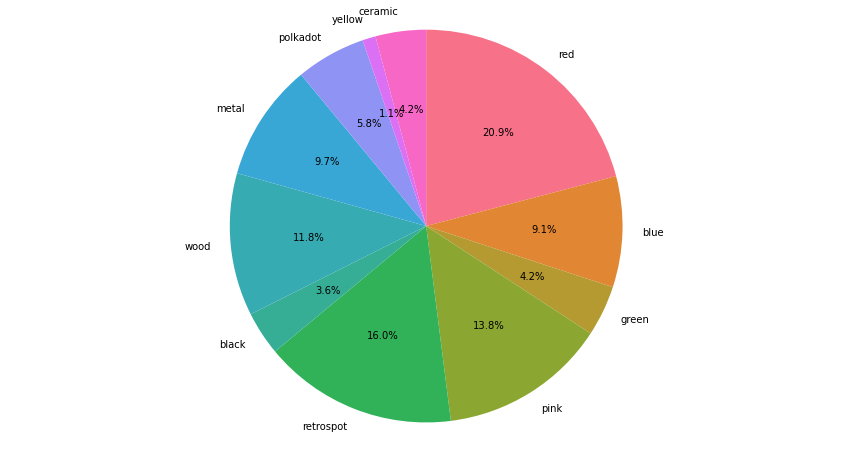

In [120]:
colors = list(count.keys())
values = list(count.values())

colors = list(count.keys())
values = list(count.values())

sns.set_palette(sns.color_palette("husl", len(colors)))

plt.pie(values, labels=colors, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

The red color is the most popular, followed by pink. The spot pattern, which is similar to polkadot, is also a very popular choice.

In [121]:
def count_rows_with_words_cat(df, column_name, words):
    ''' the function returns a dictionary of counts of rows that contain each word of the list words
    in each category of the DataFrame.'''
    counts = {}
    for name, group in df.groupby("categories"):
        for word in words:
            mask = group[column_name].str.contains(word, case=False)
            count = group[mask].shape[0]
            if name not in counts:
                counts[name] = {}
            counts[name][word] = count
    return counts

In [122]:
words = ["red", "blue", "green", "pink", "retrospot", "black", "wood", "metal", "polkadot","yellow", "ceramic"]
count_cat = count_rows_with_words_cat(df, "lemmatized_description", words)

In [123]:
count_cat

{'London': {'red': 0,
  'blue': 0,
  'green': 0,
  'pink': 237,
  'retrospot': 0,
  'black': 0,
  'wood': 412,
  'metal': 0,
  'polkadot': 0,
  'yellow': 0,
  'ceramic': 0},
 'bags': {'red': 5663,
  'blue': 1049,
  'green': 17,
  'pink': 3595,
  'retrospot': 4871,
  'black': 957,
  'wood': 2245,
  'metal': 41,
  'polkadot': 2126,
  'yellow': 8,
  'ceramic': 0},
 'bathroom': {'red': 620,
  'blue': 261,
  'green': 0,
  'pink': 1262,
  'retrospot': 543,
  'black': 0,
  'wood': 993,
  'metal': 5,
  'polkadot': 191,
  'yellow': 0,
  'ceramic': 0},
 'bottles': {'red': 0,
  'blue': 17,
  'green': 0,
  'pink': 0,
  'retrospot': 209,
  'black': 0,
  'wood': 0,
  'metal': 0,
  'polkadot': 0,
  'yellow': 0,
  'ceramic': 0},
 'candles and lights': {'red': 110,
  'blue': 212,
  'green': 147,
  'pink': 1145,
  'retrospot': 285,
  'black': 119,
  'wood': 410,
  'metal': 426,
  'polkadot': 0,
  'yellow': 5,
  'ceramic': 8},
 'decorations & gifts': {'red': 5609,
  'blue': 1330,
  'green': 261,
  'pink'

In [124]:
def count_rows_with_words_3(df, column_name, words):
    '''The given code defines a function that counts the number of rows in a pandas DataFrame
    that contain each word in a given list for each category in a specified column.
    the function returns a pandas DataFrame created from the counts dictionary'''
    counts = {}
    for name, group in df.groupby("categories"):
        for word in words:
            mask = group[column_name].str.contains(word, case=False)
            count = group[mask].shape[0]
            if name not in counts:
                counts[name] = {}
            counts[name][word] = count
    return pd.DataFrame.from_dict(counts, orient="index")

In [125]:
words = ["red", "blue", "green", "pink", "black", "wood", "metal", "yellow", "ceramic"]
count1 = count_rows_with_words_3(df, "lemmatized_description", words)

In [126]:
count1

red  blue  green  pink  black  wood  metal  yellow  \
London                  0     0      0   237      0   412      0       0   
bags                 5663  1049     17  3595    957  2245     41       8   
bathroom              620   261      0  1262      0   993      5       0   
bottles                 0    17      0     0      0     0      0       0   
candles and lights    110   212    147  1145    119   410    426       5   
decorations & gifts  5609  1330    261  2214    192  2183    770       0   
easter                  0    11     11   137      0     0     17      84   
free time            1467  1032    152   665    751  1735      0       9   
garden                  0   753    387   381      0  1267    461     119   
home                 6963  5562   1762  2450   1047  4964  14398     116   
kids                 1558  1117    470  2379     19  1040      0      62   
kitchen              9142  2732   1163  3964    678   799   1239    1222   
knick knack          5569  2036   2702  6006    925   686   1143     393   
lunch                1811  1185     17  1121   1406  1799      0       0   
other                 752   378    268   700    160   787    515     121   
skull                   0     0      0     9    228     0      0       0   
styling               748   329    342   468    323   155      0      23   
valentine             989   180    545  2010    333  1585    904      92   
winter & christmas   2375  1269    405   626    427  2076   1020     103   
work                 2180   442    442   681    310  2472    137       0   

                     ceramic  
London                     0  
bags                       0  
bathroom                   0  
bottles                    0  
candles and lights         8  
decorations & gifts        0  
easter                     0  
free time                  0  
garden                     0  
home                    3710  
kids                       0  
kitchen                 2562  
knick knack             1172  
lunch                      0  
other                     88  
skull                      0  
styling                    0  
valentine               1074  
winter & christmas       185  
work                     261

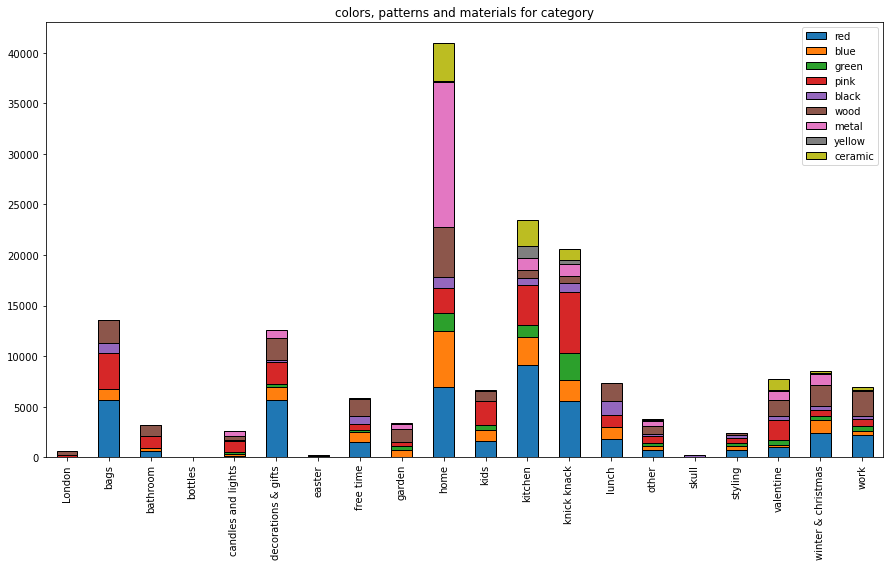

In [127]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a55FF']
ax = count1.plot.bar(stacked=True, color=colors, edgecolor='black',figsize=(15, 8) )
plt.title('colors, patterns and materials for category')
plt.show()

        

Let's have a look at the trends of orders of different kind of items, on a monthly basis: With the following function, I can select an item or a specification and see the variation in terms of order during the year:

In [128]:
def count_and_visualize_monthly_orders(df, lemma):
    '''The function first filters the DataFrame to only include rows where the
    'lemmatized_description' column contains the input lemma. Then, it groups 
    the resulting DataFrame by month and counts the number of unique orders using the 'invoice_no' column. 
    Finally, it creates a line chart using Seaborn to visualize the monthly orders over time.'''
    
    
    df=df.loc[df['lemmatized_description'].str.contains(lemma)]
    
    
    df_grouped =  df.set_index('invoice_date')['invoice_no'].resample('M').nunique().reset_index()
    
    # Plot the line chart visualization
    
    rcParams['figure.figsize'] = 15,8
    ax = sns.lineplot(x='invoice_date', y='invoice_no', data=df_grouped, linewidth = 2)
    ax.set_xlabel('month', fontsize=14)
    ax.set_ylabel('number of orders', fontsize=14)
    ax.set_title('Total Number of Orders Over Time')
    plt.grid(True)
    plt.xticks( rotation=45 )
    plt.show()

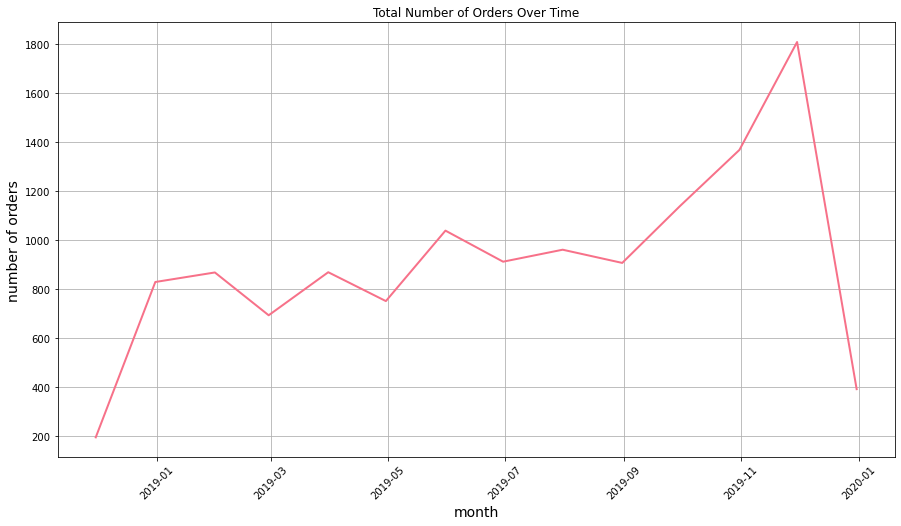

In [129]:
count_and_visualize_monthly_orders(df, 'red')

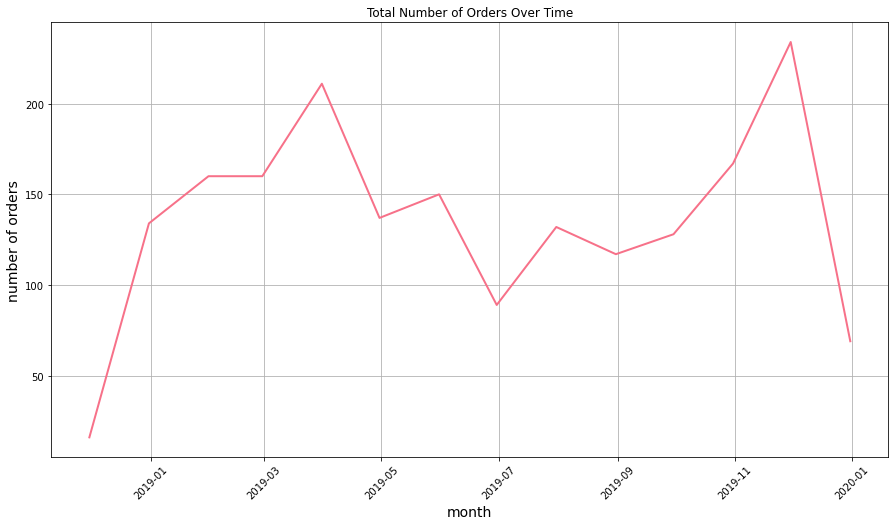

In [130]:
count_and_visualize_monthly_orders(df, 'yellow')

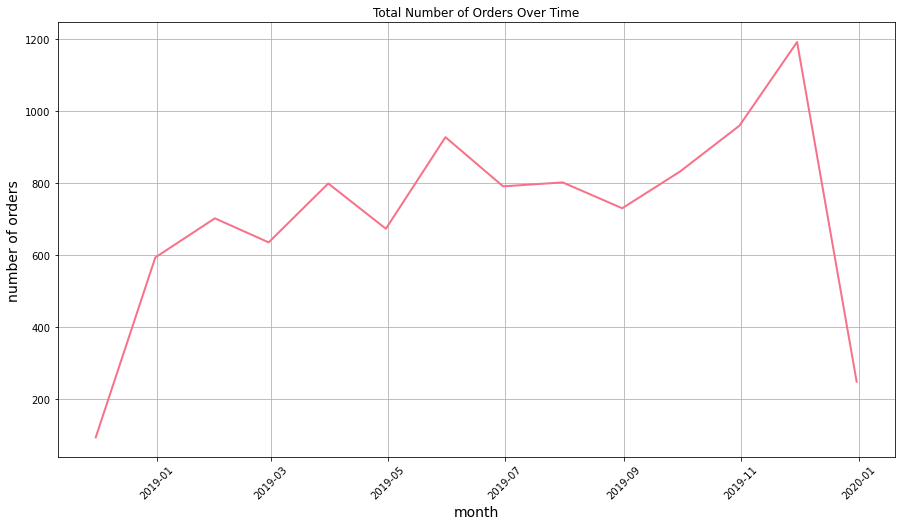

In [131]:
count_and_visualize_monthly_orders(df, 'pink')

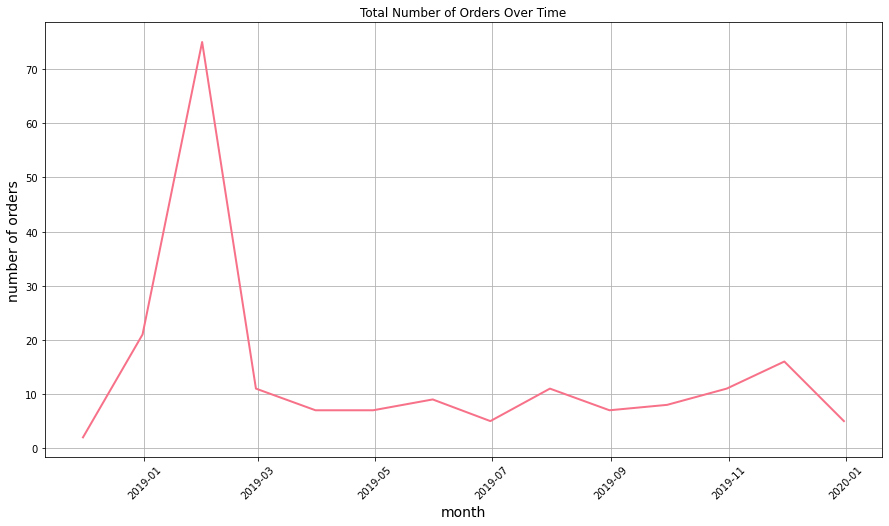

In [132]:
count_and_visualize_monthly_orders(df, 'valentine')

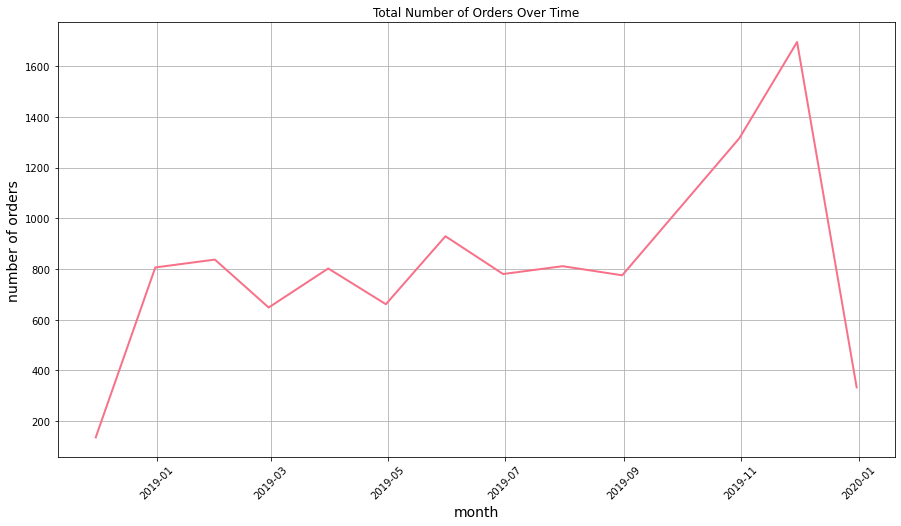

In [133]:
count_and_visualize_monthly_orders(df, 'heart')

In [134]:
def count_and_visualize_monthly_orders_multiple(df, lemmas):
    '''The function first sets the size of the chart using rcParams. It then creates a new figure and axis using
    plt.subplots(). Next, the function loops through each lemma in the input lemmas list, and filters the DataFrame 
    to only include rows where the 'lemmatized_description' column contains the current lemma. It then groups
    the resulting DataFrame by month and counts the number of unique orders using the 'invoice_no' column. Finally, it creates a line chart using Seaborn
    to visualize the monthly orders over time, with a different color and label for each lemma'''
    rcParams['figure.figsize'] = 15, 8
    fig, ax = plt.subplots()
    
    for lemma in lemmas:
        df_lemma = df.loc[df['lemmatized_description'].str.contains(lemma)]
        df_grouped = df_lemma.set_index('invoice_date')['invoice_no'].resample('M').nunique().reset_index()
        sns.lineplot(x='invoice_date', y='invoice_no', data=df_grouped, linewidth = 2, label=lemma)
    
    ax.set_xlabel('month', fontsize=14)
    ax.set_ylabel('number of orders', fontsize=14)
    ax.set_title('Total Number of Orders Over Time')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='lemmas')
    plt.show() 

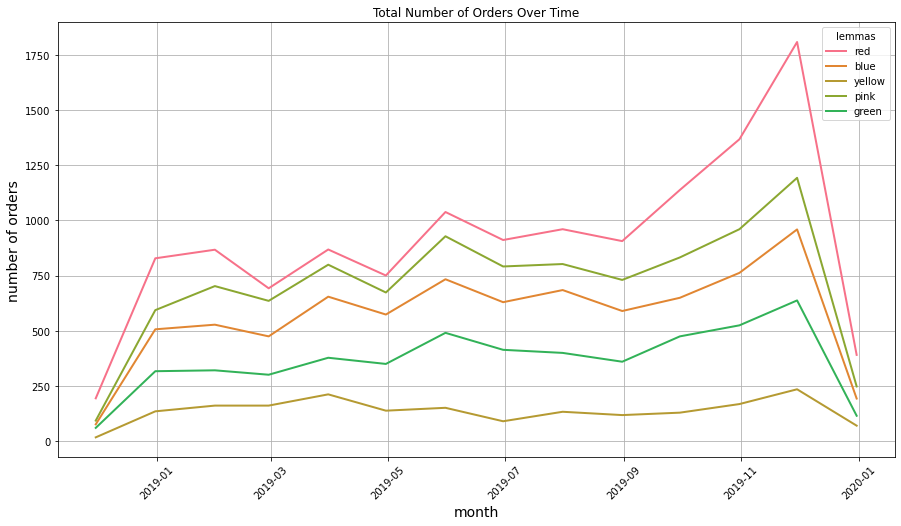

In [135]:
lemmas = ['red', 'blue', 'yellow', 'pink','green']
count_and_visualize_monthly_orders_multiple(df, lemmas)

Different colors follow similar trends, just in a smaller measur of items sold.

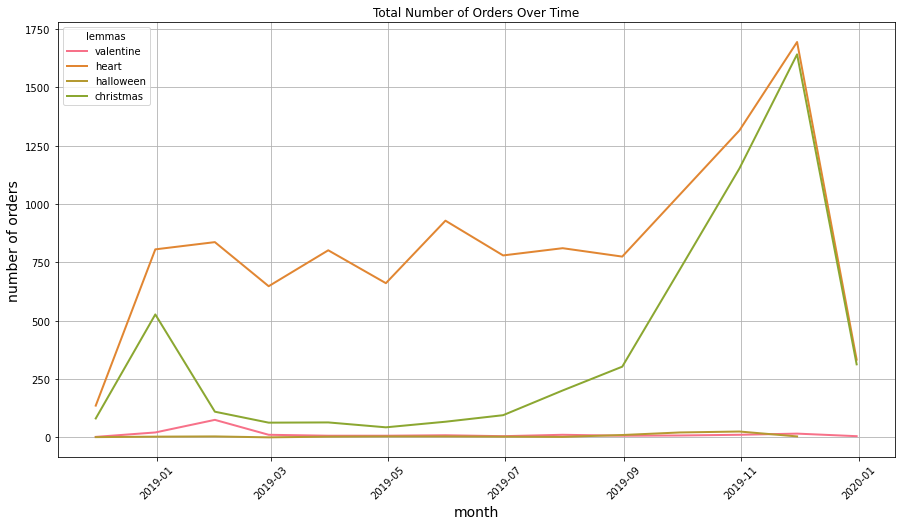

In [136]:
lemmas = ['valentine', 'heart', 'halloween', 'christmas']
count_and_visualize_monthly_orders_multiple(df, lemmas)

Different themed items, follow different trends. Valentine's Items are mostly sold in February, halloween items has a slight increase around october, Christmas Items are sold mostly from the beginning of september. Heart Items are sold throughtout the year, with Increase from September.

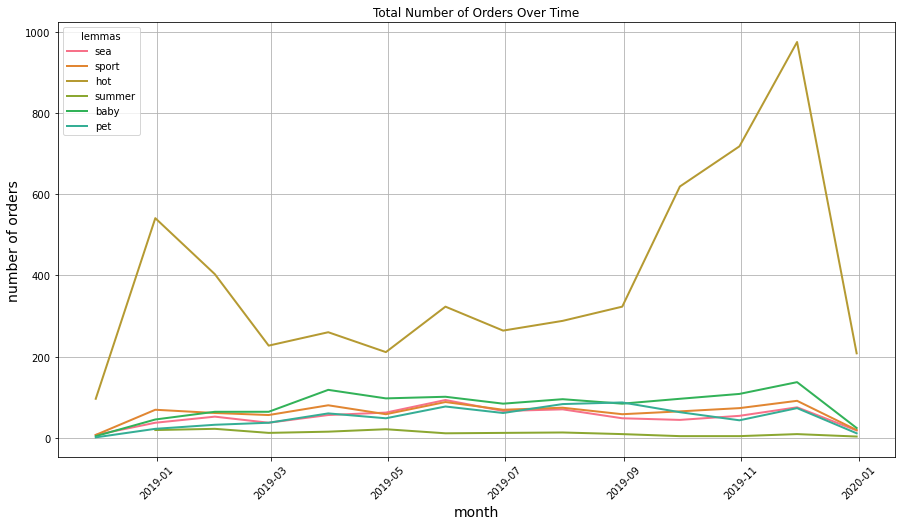

In [137]:
lemmas = ['sea', 'sport', 'hot', 'summer', 'baby', 'pet']
count_and_visualize_monthly_orders_multiple(df, lemmas)

'Hot' sells a lot, especially in winter and it peaks in Christmas time.

In [138]:
hot_products = df[df['lemmatized_description'].str.contains('hot', case=False)]
hot_products = hot_products.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

print(hot_products)

description
hot baths metal sign                   7186
chocolate hot water bottle             5889
hot water bottle keep calm             5720
hot water bottle tea and sympathy      5658
red woolly hottie white heart.         4667
scottie dog hot water bottle           4526
feather pen,hot pink                   3770
white skull hot water bottle           3730
retrospot heart hot water bottle       3504
knitted union flag hot water bottle    3305
Name: quantity, dtype: int64


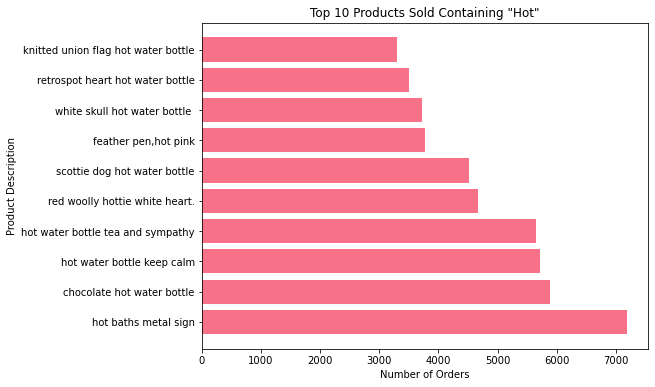

In [139]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(hot_products.index, hot_products.values)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Product Description')
ax.set_title('Top 10 Products Sold Containing "Hot"')
plt.show()

In [140]:
df

invoice_no stock_code                          description  quantity  \
0          536365     85123a   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406b       cream cupid hearts coat hanger         8   
3          536365     84029g  knitted union flag hot water bottle         6   
4          536365     84029e       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          pack of 20 spaceboy napkins        12   
541905     581587      22899         children's apron dolly girl          6   
541906     581587      23254        childrens cutlery dolly girl          4   
541907     581587      23255      childrens cutlery circus parade         4   
541908     581587      22138        baking set 9 piece retrospot          3   

              invoice_date  unit_price  customer_id  sales  \
0      2018-11-29 08:26:00        2.55      17850.0  15.30   
1      2018-11-29 08:26:00        3.39      17850.0  20.34   
2      2018-11-29 08:26:00        2.75      17850.0  22.00   
3      2018-11-29 08:26:00        3.39      17850.0  20.34   
4      2018-11-29 08:26:00        3.39      17850.0  20.34   
...                    ...         ...          ...    ...   
541904 2019-12-07 12:50:00        0.85      12680.0  10.20   
541905 2019-12-07 12:50:00        2.10      12680.0  12.60   
541906 2019-12-07 12:50:00        4.15      12680.0  16.60   
541907 2019-12-07 12:50:00        4.15      12680.0  16.60   
541908 2019-12-07 12:50:00        4.95      12680.0  14.85   

                     lemmatized_description          categories  
0        white hanging heart t-light holder                home  
1                       white metal lantern  candles and lights  
2             cream cupid heart coat hanger            bathroom  
3       knitted union flag hot water bottle                home  
4           red woolly hottie white heart .  winter & christmas  
...                                     ...                 ...  
541904              pack 20 spaceboy napkin                kids  
541905            child 's apron dolly girl                kids  
541906         childrens cutlery dolly girl                kids  
541907      childrens cutlery circus parade                kids  
541908         baking set 9 piece retrospot             kitchen  

[531367 rows x 10 columns]

In [141]:
top_products_revenue = df.groupby('lemmatized_description')['sales'].sum().sort_values(ascending=False).index[:5]

print('The top 5 products that generated the highest revenue are:')
for i, lemma in enumerate(top_products_revenue):
    print(f'{i+1}. "{lemma}"')

The top 5 products that generated the highest revenue are:
1. "regency cakestand 3 tier"
2. "white hanging heart t-light holder"
3. "party bunting"
4. "jumbo bag red retrospot"
5. "rabbit night light"


#### Returned Items rate:

calculate the total sum of units ordered, calculate the sum of returned units, calculate the return rate as the percentage of returned unit

In [142]:


total_units = df['quantity'].abs().sum()


returned_units = df[df['quantity'] < 0]['quantity'].abs().sum()


return_rate = returned_units / total_units

print(f"the rate of returned items is: {return_rate}")


the rate of returned items is: 0.01755351012864929


In [143]:
returned_items= df.query("quantity<0").groupby(['stock_code','description']).agg({'quantity': 'sum', 
                                                                        'customer_id':'nunique',
                                                                        'invoice_no' : 'count'})
returned_items.columns=['quantity_returned', 'number_of_customers', 'number_of_invoices']

Top 20 returned items:

In [144]:
top_20_returned_items=returned_items.sort_values(by='number_of_invoices', ascending=False).head(20)
display(top_20_returned_items)

quantity_returned  \
stock_code description                                              
22423      regency cakestand 3 tier                          -855   
22960      jam making set with jars                          -247   
22720      set of 3 cake tins pantry design                  -154   
22699      roses regency teacup and saucer                   -437   
21232      strawberry ceramic trinket box                    -362   
22666      recipe box pantry yellow design                   -151   
20725      lunch bag red retrospot                           -574   
85099b     jumbo bag red retrospot                          -1115   
22697      green regency teacup and saucer                   -143   
21843      red retrospot cake stand                          -322   
82483      wood 2 drawer cabinet white finish                -203   
85123a     white hanging heart t-light holder                -648   
21314      small glass heart trinket pot                     -139   
23245      set of 3 regency cake tins                         -90   
22197      popcorn holder                                    -427   
84949      silver hanging t-light holder                     -263   
23243      set of tea coffee sugar tins pantry               -117   
22698      pink regency teacup and saucer                    -138   
23169      classic glass cookie jar                           -93   
20914      set/5 red retrospot lid glass bowls               -107   

                                                number_of_customers  \
stock_code description                                                
22423      regency cakestand 3 tier                             116   
22960      jam making set with jars                              71   
22720      set of 3 cake tins pantry design                      58   
22699      roses regency teacup and saucer                       43   
21232      strawberry ceramic trinket box                        36   
22666      recipe box pantry yellow design                       43   
20725      lunch bag red retrospot                               35   
85099b     jumbo bag red retrospot                               30   
22697      green regency teacup and saucer                       39   
21843      red retrospot cake stand                              34   
82483      wood 2 drawer cabinet white finish                    33   
85123a     white hanging heart t-light holder                    38   
21314      small glass heart trinket pot                         30   
23245      set of 3 regency cake tins                            31   
22197      popcorn holder                                        25   
84949      silver hanging t-light holder                         25   
23243      set of tea coffee sugar tins pantry                   32   
22698      pink regency teacup and saucer                        31   
23169      classic glass cookie jar                              27   
20914      set/5 red retrospot lid glass bowls                   30   

                                                number_of_invoices  
stock_code description                                              
22423      regency cakestand 3 tier                            180  
22960      jam making set with jars                             87  
22720      set of 3 cake tins pantry design                     73  
22699      roses regency teacup and saucer                      54  
21232      strawberry ceramic trinket box                       54  
22666      recipe box pantry yellow design                      47  
20725      lunch bag red retrospot                              44  
85099b     jumbo bag red retrospot                              44  
22697      green regency teacup and saucer                      42  
21843      red retrospot cake stand                             42  
82483      wood 2 drawer cabinet white finish                   42  
85123a     white hanging heart t-light holder                   41  


Top 20 bought Items:

In [145]:
bought_items= df.query("quantity>0").groupby(['stock_code','description']).agg({'quantity': 'sum', 
                                                                        'customer_id':'nunique',
                                                                        'invoice_no' : 'count'})
bought_items.columns=['quantity_returned', 'number_of_customers', 'number_of_invoices']
top_20_bought_items=bought_items.sort_values(by='number_of_invoices', ascending=False).head(20)
display(top_20_bought_items)

quantity_returned  \
stock_code description                                             
85123a     white hanging heart t-light holder              35942   
85099b     jumbo bag red retrospot                         48371   
22423      regency cakestand 3 tier                        13851   
47566      party bunting                                   18283   
20725      lunch bag red retrospot                         19232   
84879      assorted colour bird ornament                   36362   
22720      set of 3 cake tins pantry design                 7483   
21212      pack of 72 retrospot cake cases                 36396   
20727      lunch bag  black skull.                         12195   
22457      natural slate heart chalkboard                   9119   
22386      jumbo bag pink polkadot                         21448   
22469      heart of wicker small                           17963   
21931      jumbo storage bag suki                          13651   
22086      paper chain kit 50's christmas                  19329   
22411      jumbo shopper vintage red paisley               12574   
22382      lunch bag spaceboy design                       10427   
22961      jam making set printed                          16396   
20728      lunch bag cars blue                             11786   
23298      spotty bunting                                   8320   
22960      jam making set with jars                         8695   

                                               number_of_customers  \
stock_code description                                               
85123a     white hanging heart t-light holder                  856   
85099b     jumbo bag red retrospot                             635   
22423      regency cakestand 3 tier                            881   
47566      party bunting                                       708   
20725      lunch bag red retrospot                             532   
84879      assorted colour bird ornament                       678   
22720      set of 3 cake tins pantry design                    640   
21212      pack of 72 retrospot cake cases                     635   
20727      lunch bag  black skull.                             458   
22457      natural slate heart chalkboard                      587   
22386      jumbo bag pink polkadot                             372   
22469      heart of wicker small                               573   
21931      jumbo storage bag suki                              333   
22086      paper chain kit 50's christmas                      613   
22411      jumbo shopper vintage red paisley                   375   
22382      lunch bag spaceboy design                           490   
22961      jam making set printed                              537   
20728      lunch bag cars blue                                 479   
23298      spotty bunting                                      571   
22960      jam making set with jars                            573   

                                               number_of_invoices  
stock_code description                                             
85123a     white hanging heart t-light holder                2310  
85099b     jumbo bag red retrospot                           2109  
22423      regency cakestand 3 tier                          2007  
47566      party bunting                                     1699  
20725      lunch bag red retrospot                           1581  
84879      assorted colour bird ornament                     1476  
22720      set of 3 cake tins pantry design                  1392  
21212      pack of 72 retrospot cake cases                   1352  
20727      lunch bag  black skull.                           1301  
22457      natural slate heart chalkboard                    1255  
22386      jumbo bag pink polkadot                           1232  
22469      heart of wicker small                             1219  
21931      jumbo storage bag suki                        

### BASKET ANALYSIS

Basket analysis is a technique used to identify relationships between products that are frequently purchased together by customers. It involves analyzing transactional data to uncover patterns and associations between items that are often bought together, and can be used to inform merchandising, pricing, and promotional strategies.

In [146]:
df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123a   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406b       cream cupid hearts coat hanger         8   
3     536365     84029g  knitted union flag hot water bottle         6   
4     536365     84029e       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id  sales  \
0 2018-11-29 08:26:00        2.55      17850.0  15.30   
1 2018-11-29 08:26:00        3.39      17850.0  20.34   
2 2018-11-29 08:26:00        2.75      17850.0  22.00   
3 2018-11-29 08:26:00        3.39      17850.0  20.34   
4 2018-11-29 08:26:00        3.39      17850.0  20.34   

                lemmatized_description          categories  
0   white hanging heart t-light holder                home  
1                  white metal lantern  candles and lights  
2        cream cupid heart coat hanger            bathroom  
3  knitted union flag hot water bottle                home  
4      red woolly hottie white heart .  winter & christmas

In [147]:
df_grouped = df.groupby(['invoice_no', 'description']).sum().reset_index()

/var/folders/pt/x9nfkvnn0wd8cjs1l7kttgf40000gp/T/ipykernel_43771/3063363481.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [148]:
display(df_grouped)

invoice_no                          description  quantity  unit_price  \
0          536365       cream cupid hearts coat hanger         8        2.75   
1          536365    glass star frosted t-light holder         6        4.25   
2          536365  knitted union flag hot water bottle         6        3.39   
3          536365       red woolly hottie white heart.         6        3.39   
4          536365         set 7 babushka nesting boxes         2        7.65   
...           ...                                  ...       ...         ...   
525895    c581490      victorian glass hanging t-light       -12        1.95   
525896    c581490      zinc t-light holder stars small       -11        0.83   
525897    c581568           victorian sewing box large        -5       10.95   
525898    c581569        36 pencils tube red retrospot        -5        1.25   
525899    c581569     hanging heart jar t-light holder        -1        1.25   

        customer_id  sales  
0           17850.0  22.00  
1           17850.0  25.50  
2           17850.0  20.34  
3           17850.0  20.34  
4           17850.0  15.30  
...             ...    ...  
525895      14397.0 -23.40  
525896      14397.0  -9.13  
525897      15311.0 -54.75  
525898      17315.0  -6.25  
525899      17315.0  -1.25  

[525900 rows x 6 columns]

In [149]:
df_pivot_description = df_grouped.pivot(index='invoice_no', columns='description', values='quantity').fillna(0)

df_pivot_description

description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_no                                                                    
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   
...                                     ...                             ...   
c581468                                 0.0                             0.0   
c581470                                 0.0                             0.0   
c581490                                 0.0                             0.0   
c581568                                 0.0                             0.0   
c581569                                 0.0                             0.0   

description   dolly girl beaker   i love london mini backpack  \
invoice_no                                                      
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0                           0.0   
...                         ...                           ...   
c581468                     0.0                           0.0   
c581470                     0.0                           0.0   
c581490                     0.0                           0.0   
c581568                     0.0                           0.0   
c581569                     0.0                           0.0   

description   i love london mini rucksack   nine drawer office tidy  \
invoice_no                                                            
536365                                0.0                       0.0   
536366                                0.0                       0.0   
536367                                0.0                       0.0   
536368                                0.0                       0.0   
536369                                0.0                       0.0   
...                                   ...                       ...   
c581468                               0.0                       0.0   
c581470                               0.0                       0.0   
c581490                               0.0                       0.0   
c581568                               0.0                       0.0   
c581569                               0.0                       0.0   

description   oval wall mirror diamante    red spot gift bag large  \
invoice_no                                                           
536365                               0.0                       0.0   
536366                               0.0                       0.0   
536367                               0.0                       0.0   
536368                               0.0                       0.0   
536369                               0.0                       0.0   
...                                  ...                       ...   
c581468                              0.0                       0.0   
c581470                              0.0                       0.0   
c581490                              0.0                       0.0   
c581568                              0.0                       0.0   
c581569                              0.0                       0.0   

description   set 2 tea towels i love london    spaceboy baby gift set  ...  \
invoice_no                                                              ...   
536365                                    0.0                      0.0  ...   
536366                                    0.0         

convert to binary values:

In [150]:
df_binary = df_pivot_description.astype(bool).astype(int)

This line converts the pivot table df_pivot_description to a binary representation. The .astype(bool) method first converts the data type of the pivot table to boolean, where each cell is True if the corresponding value in df_pivot_description is greater than 0 and False otherwise. The resulting boolean pivot table is then converted to integer values using .astype(int), where each True value is mapped to 1 and each False value is mapped to 0. The resulting data frame, df_binary, is a binary representation of the transaction data set.

In [151]:
frequent_itemsets = apriori(df_binary, min_support=0.02, use_colnames=True).sort_values(by='support')

/Users/stefaniachiesa/.local/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



The line of code performs a frequent item set analysis using the Apriori algorithm.

The Apriori algorithm is a popular data mining algorithm that is used to identify frequent itemsets in a transactional database. In the context of this code, the algorithm is applied to df_binary, where each row represents a transaction and each column represents a product. The binary values in the data frame indicate whether a particular product was purchased (1) or not (0) in a particular transaction.

The min_support argument to the apriori function specifies the minimum support threshold. An itemset is considered frequent if its support is greater than or equal to the minimum support. In this case, the minimum support is set to 0.02, meaning that an itemset is considered frequent if it appears in 2% or more of the transactions in the data set.

The use_colnames argument is set to True, which indicates that the names of the columns (i.e., the product names) should be used as item labels instead of integer indices.

Finally, the results of the Apriori analysis are sorted by the support values using the .sort_values(by='support') method. The result of the apriori function is a data frame with the frequent itemsets and their support values. The resulting data frame is stored in the frequent_itemsets variable.

In [152]:
display(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

support                              itemsets
207  0.099004  (white hanging heart t-light holder)
160  0.093485            (regency cakestand 3 tier)
80   0.091932             (jumbo bag red retrospot)
129  0.073520                       (party bunting)
104  0.069294             (lunch bag red retrospot)
11   0.063257       (assorted colour bird ornament)
172  0.062869   (set of 3 cake tins pantry design )
122  0.057522     (pack of 72 retrospot cake cases)
97   0.055841             (lunch bag  black skull.)
115  0.054590     (natural slate heart chalkboard )

The item with the highest support is the "white hanging heart t-light holder" with a support of 0.099004 or 9.9% of transactions.
The item with the second highest support is the "regency cakestand 3 tier" with a support of 0.093485 or 9.3% of transactions.
The items with the third highest support are the "jumbo bag red retrospot" and "party bunting" with a support of 9.2% and 7.4% of transactions, respectively.
The remaining items have a support of less than 7% of transactions.
From these results, it can be concluded that the "white hanging heart t-light holder" and "regency cakestand 3 tier" are the most popular items in the data set, and that the remaining items have a relatively lower popularity.

This information can be useful for various applications such as product recommendations, market basket analysis, or promotional planning. For example, a retailer could use this information to stock more of the popular items or to create promotions or advertisements to increase sales of the less popular items.

The ***association rules*** can be used to identify items that are commonly purchased together, which can be useful for various applications such as product recommendations, market basket analysis, or promotional planning. 

The following code performs association rule mining using the association_rules function from the mlxtend library. This function generates rules that describe the relationships between the items in the frequent itemsets determined by the Apriori algorithm.

The frequent_itemsets input to the function is the result of the Apriori analysis that was performed in the previous step. The metric argument specifies the evaluation metric that is used to evaluate the strength of the association rules. In this case, the lift metric is used, which is a measure of the likelihood of two items being purchased together, given the probability of each item being purchased individually. The min_threshold argument specifies the minimum lift threshold for the rules. In this case, the threshold is set to 0.5, meaning that only rules with a lift of 0.5 or greater are considered significant.

The result of the association_rules function is a data frame containing the generated association rules, which is stored in the rules variable. The display function is used to print the contents of the data frame, making it easier to inspect the results.

In [153]:


# Find the association rules between the items
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Print the association rules
display(rules)

antecedents                          consequents  \
0             (jumbo bag pink polkadot)  (jumbo shopper vintage red paisley)   
1   (jumbo shopper vintage red paisley)            (jumbo bag pink polkadot)   
2              (lunch bag suki design )                (lunch bag cars blue)   
3                 (lunch bag cars blue)             (lunch bag suki design )   
4              (jam making set printed)           (jam making set with jars)   
..                                  ...                                  ...   
93             (jumbo storage bag suki)            (jumbo bag red retrospot)   
94    (green regency teacup and saucer)   (roses regency teacup and saucer )   
95   (roses regency teacup and saucer )    (green regency teacup and saucer)   
96            (jumbo bag red retrospot)            (jumbo bag pink polkadot)   
97            (jumbo bag pink polkadot)            (jumbo bag red retrospot)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.053081            0.051184  0.020353    0.383428   7.491223   
1             0.051184            0.053081  0.020353    0.397641   7.491223   
2             0.047518            0.050580  0.020482    0.431034   8.521842   
3             0.050580            0.047518  0.020482    0.404945   8.521842   
4             0.050623            0.052563  0.020482    0.404600   7.697351   
..                 ...                 ...       ...         ...        ...   
93            0.051787            0.091932  0.031607    0.610325   6.638856   
94            0.045492            0.048251  0.033763    0.742180  15.381500   
95            0.048251            0.045492  0.033763    0.699732  15.381500   
96            0.091932            0.053081  0.035919    0.390713   7.360702   
97            0.053081            0.091932  0.035919    0.676686   7.360702   

    leverage  conviction  
0   0.017636    1.538858  
1   0.017636    1.572018  
2   0.018079    1.668678  
3   0.018079    1.600660  
4   0.017821    1.591260  
..       ...         ...  
93  0.026846    2.330319  
94  0.031568    3.691525  
95  0.031568    3.178853  
96  0.031039    1.554143  
97  0.031039    2.808622  

[98 rows x 9 columns]

***Sort the rules by lift*** 

Lift is a measure of the strength of the association between two items in a market basket analysis. It is calculated as the ratio of the observed support for the itemset (the number of transactions in which both items appear together) to the expected support, given the independence of the items.

In other words, lift measures the likelihood of two items being purchased together, compared to what would be expected if the items were purchased independently. If the lift value is greater than 1, it indicates that the two items are more likely to be purchased together than would be expected by chance, and the higher the lift value, the stronger the association between the items.

A lift value of 1 indicates that the items are independent, and have no association with each other. A lift value greater than 1 indicates that the items are positively associated, and the likelihood of both items being purchased together is higher than would be expected if they were purchased independently. For example, a lift value of 2 means that the likelihood of both items being purchased together is twice as high as would be expected if they were purchased independently.

In [154]:


rules.sort_values(by="lift", ascending=False, inplace=True)


# Select the top 10 rules
top_10_rules = rules.head(10)

# Print the top 10 rules
display(top_10_rules)

antecedents  \
63                   (pink regency teacup and saucer)   
58  (green regency teacup and saucer, roses regenc...   
60  (roses regency teacup and saucer , pink regenc...   
61                  (green regency teacup and saucer)   
64               (gardeners kneeling pad cup of tea )   
65                (gardeners kneeling pad keep calm )   
84                  (green regency teacup and saucer)   
85                   (pink regency teacup and saucer)   
62                 (roses regency teacup and saucer )   
59  (green regency teacup and saucer, pink regency...   

                                          consequents  antecedent support  \
63  (green regency teacup and saucer, roses regenc...            0.034496   
58                   (pink regency teacup and saucer)            0.033763   
60                  (green regency teacup and saucer)            0.026433   
61  (roses regency teacup and saucer , pink regenc...            0.045492   
64                (gardeners kneeling pad keep calm )            0.032987   
65               (gardeners kneeling pad cup of tea )            0.039843   
84                   (pink regency teacup and saucer)            0.045492   
85                  (green regency teacup and saucer)            0.034496   
62  (green regency teacup and saucer, pink regency...            0.048251   
59                 (roses regency teacup and saucer )            0.027726   

    consequent support   support  confidence       lift  leverage  conviction  
63            0.033763  0.023630    0.685000  20.288423  0.022465    3.067419  
58            0.034496  0.023630    0.699872  20.288423  0.022465    3.216977  
60            0.045492  0.023630    0.893964  19.651111  0.022427    9.001747  
61            0.026433  0.023630    0.519431  19.651111  0.022427    2.025865  
64            0.039843  0.023673    0.717647  18.011854  0.022359    3.400556  
65            0.032987  0.023673    0.594156  18.011854  0.022359    2.382720  
84            0.034496  0.027726    0.609479  17.668025  0.026157    2.472346  
85            0.045492  0.027726    0.803750  17.668025  0.026157    4.863736  
62            0.027726  0.023630    0.489723  17.662777  0.022292    1.905384  
59            0.048251  0.023630    0.852255  17.662777  0.022292    6.441835

In [155]:

# Print the top 10 rules
display(top_10_rules)

antecedents  \
63                   (pink regency teacup and saucer)   
58  (green regency teacup and saucer, roses regenc...   
60  (roses regency teacup and saucer , pink regenc...   
61                  (green regency teacup and saucer)   
64               (gardeners kneeling pad cup of tea )   
65                (gardeners kneeling pad keep calm )   
84                  (green regency teacup and saucer)   
85                   (pink regency teacup and saucer)   
62                 (roses regency teacup and saucer )   
59  (green regency teacup and saucer, pink regency...   

                                          consequents  antecedent support  \
63  (green regency teacup and saucer, roses regenc...            0.034496   
58                   (pink regency teacup and saucer)            0.033763   
60                  (green regency teacup and saucer)            0.026433   
61  (roses regency teacup and saucer , pink regenc...            0.045492   
64                (gardeners kneeling pad keep calm )            0.032987   
65               (gardeners kneeling pad cup of tea )            0.039843   
84                   (pink regency teacup and saucer)            0.045492   
85                  (green regency teacup and saucer)            0.034496   
62  (green regency teacup and saucer, pink regency...            0.048251   
59                 (roses regency teacup and saucer )            0.027726   

    consequent support   support  confidence       lift  leverage  conviction  
63            0.033763  0.023630    0.685000  20.288423  0.022465    3.067419  
58            0.034496  0.023630    0.699872  20.288423  0.022465    3.216977  
60            0.045492  0.023630    0.893964  19.651111  0.022427    9.001747  
61            0.026433  0.023630    0.519431  19.651111  0.022427    2.025865  
64            0.039843  0.023673    0.717647  18.011854  0.022359    3.400556  
65            0.032987  0.023673    0.594156  18.011854  0.022359    2.382720  
84            0.034496  0.027726    0.609479  17.668025  0.026157    2.472346  
85            0.045492  0.027726    0.803750  17.668025  0.026157    4.863736  
62            0.027726  0.023630    0.489723  17.662777  0.022292    1.905384  
59            0.048251  0.023630    0.852255  17.662777  0.022292    6.441835

*The conclusion that can be drawn from this information is that there are certain items in the dataset that have a strong association with each other. For example, the rule with the highest lift value (20.29) states that customers who purchased the "roses regency teacup and saucer" and "green regency teacup and saucer" are highly likely to also purchase the "pink regency teacup and saucer". The lift value indicates the strength of the association between two items, and the higher the lift, the stronger the association.*

*Additionally, the confidence of a rule can also be observed, which is the proportion of transactions that contain the antecedent (i.e. the "if" part of the rule) that also contain the consequent (i.e. the "then" part of the rule). For example, the rule with the highest confidence (0.904) states that 89.39% of customers who purchased the "roses regency teacup and saucer" and "pink regency teacup and saucer" also purchased the "green regency teacup and saucer".*



In [156]:
rules1 = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)
rules1.sort_values('confidence', ascending = False, inplace = True)

In [157]:
display(rules1)

antecedents  \
17  (roses regency teacup and saucer , pink regenc...   
16  (green regency teacup and saucer, pink regency...   
30                   (pink regency teacup and saucer)   
28                   (pink regency teacup and saucer)   
36                  (green regency teacup and saucer)   
20               (gardeners kneeling pad cup of tea )   
15  (green regency teacup and saucer, roses regenc...   
37                 (roses regency teacup and saucer )   
8                       (charlotte bag pink polkadot)   
19                   (pink regency teacup and saucer)   
38                          (jumbo bag pink polkadot)   
1                          (strawberry charlotte bag)   
22                (paper chain kit vintage christmas)   
3                  (red hanging heart t-light holder)   
13                             (jumbo bag strawberry)   
31                       (alarm clock bakelike green)   
25                   (jumbo  bag baroque black white)   
12                             (dolly girl lunch box)   
10                       (jumbo bag woodland animals)   
35                           (jumbo storage bag suki)   
29                  (green regency teacup and saucer)   
4                            (woodland charlotte bag)   
32                        (alarm clock bakelike red )   
0                         (alarm clock bakelike pink)   
6                    (jumbo bag pink vintage paisley)   
21                (gardeners kneeling pad keep calm )   
11                              (spaceboy lunch box )   
34                (jumbo shopper vintage red paisley)   
5                         (charlotte bag suki design)   
23                                 (jumbo bag apples)   
26                          (lunch bag pink polkadot)   
14                      (wooden frame antique white )   
27                 (roses regency teacup and saucer )   
2                             (heart of wicker large)   
18                  (green regency teacup and saucer)   
9                                (lunch bag woodland)   
24                           (lunch bag suki design )   
7                       (red retrospot charlotte bag)   
33                          (lunch bag  black skull.)   

                                          consequents  antecedent support  \
17                  (green regency teacup and saucer)            0.026433   
16                 (roses regency teacup and saucer )            0.027726   
30                  (green regency teacup and saucer)            0.034496   
28                 (roses regency teacup and saucer )            0.034496   
36                 (roses regency teacup and saucer )            0.045492   
20                (gardeners kneeling pad keep calm )            0.032987   
15                   (pink regency teacup and saucer)            0.033763   
37                  (green regency teacup and saucer)            0.048251   
8                       (red retrospot charlotte bag)            0.032728   
19  (green regency teacup and saucer, roses regenc...            0.034496   
38                          (jumbo bag red retrospot)            0.053081   
1                       (red retrospot charlotte bag)            0.031650   
22                  (paper chain kit 50's christmas )            0.035876   
3                (white hanging heart t-light holder)            0.032513   
13                          (jumbo bag red retrospot)            0.036005   
31                        (alarm clock bakelike red )            0.043163   
25                          (jumbo bag red retrospot)            0.040835   
12                              (spaceboy lunch box )            0.037083   
10                          (jumbo bag red retrospot)            0.037601   
35                          (jumbo bag red retrospot)            0.051787   
29                   (pink regency teacup and saucer)            0.045492   
4                       (red retrospot charlotte bag)            0.

***In a few words, we can observe that the customers, tend to purchase togheter the same kind of items or set of Items in different colors or patterns.***


### basket analysis by Similarity


One approach to conducting basket analysis is by using similarity measures. Similarity measures compare the similarity between items or sets of items, and can be used to identify items that are frequently purchased or used together.

In [158]:
df_binary



description   4 purple flock dinner candles   50's christmas gift bag large  \
invoice_no                                                                    
536365                                    0                               0   
536366                                    0                               0   
536367                                    0                               0   
536368                                    0                               0   
536369                                    0                               0   
...                                     ...                             ...   
c581468                                   0                               0   
c581470                                   0                               0   
c581490                                   0                               0   
c581568                                   0                               0   
c581569                                   0                               0   

description   dolly girl beaker   i love london mini backpack  \
invoice_no                                                      
536365                        0                             0   
536366                        0                             0   
536367                        0                             0   
536368                        0                             0   
536369                        0                             0   
...                         ...                           ...   
c581468                       0                             0   
c581470                       0                             0   
c581490                       0                             0   
c581568                       0                             0   
c581569                       0                             0   

description   i love london mini rucksack   nine drawer office tidy  \
invoice_no                                                            
536365                                  0                         0   
536366                                  0                         0   
536367                                  0                         0   
536368                                  0                         0   
536369                                  0                         0   
...                                   ...                       ...   
c581468                                 0                         0   
c581470                                 0                         0   
c581490                                 0                         0   
c581568                                 0                         0   
c581569                                 0                         0   

description   oval wall mirror diamante    red spot gift bag large  \
invoice_no                                                           
536365                                 0                         0   
536366                                 0                         0   
536367                                 0                         0   
536368                                 0                         0   
536369                                 0                         0   
...                                  ...                       ...   
c581468                                0                         0   
c581470                                0                         0   
c581490                                0                         0   
c581568                                0                         0   
c581569                                0                         0   

description   set 2 tea towels i love london    spaceboy baby gift set  ...  \
invoice_no                                                              ...   
536365                                      0                        0  ...   
536366                                      0         

In [159]:
df_binary_new = df_binary.reset_index()
df_binary_new 

description invoice_no   4 purple flock dinner candles  \
0               536365                               0   
1               536366                               0   
2               536367                               0   
3               536368                               0   
4               536369                               0   
...                ...                             ...   
23186          c581468                               0   
23187          c581470                               0   
23188          c581490                               0   
23189          c581568                               0   
23190          c581569                               0   

description   50's christmas gift bag large   dolly girl beaker  \
0                                         0                   0   
1                                         0                   0   
2                                         0                   0   
3                                         0                   0   
4                                         0                   0   
...                                     ...                 ...   
23186                                     0                   0   
23187                                     0                   0   
23188                                     0                   0   
23189                                     0                   0   
23190                                     0                   0   

description   i love london mini backpack   i love london mini rucksack  \
0                                       0                             0   
1                                       0                             0   
2                                       0                             0   
3                                       0                             0   
4                                       0                             0   
...                                   ...                           ...   
23186                                   0                             0   
23187                                   0                             0   
23188                                   0                             0   
23189                                   0                             0   
23190                                   0                             0   

description   nine drawer office tidy   oval wall mirror diamante   \
0                                   0                            0   
1                                   0                            0   
2                                   0                            0   
3                                   0                            0   
4                                   0                            0   
...                               ...                          ...   
23186                               0                            0   
23187                               0                            0   
23188                               0                            0   
23189                               0                            0   
23190                               0                            0   

description   red spot gift bag large   set 2 tea towels i love london   ...  \
0                                   0                                 0  ...   
1                                   0                                 0  ...   
2                                   0                                 0  ...   
3                                   0                                 0  ...   
4                                   0                                 0  ...   
...                               ...                               ...  ...   
23186                               0                                 0  ...   
23187                               0                                 0  ...   
23188                               

In [160]:
df_binary_new=df_binary_new.drop('invoice_no', axis=1)

In [161]:
co_matrix = df_binary_new.T.dot(df_binary_new)
np.fill_diagonal(co_matrix.values, 0)


This code is performing the following operations:

Transposing the dataframe: The first line df_binary_new.T transposes the dataframe df_binary_new. The transpose of a matrix switches its rows and columns, so if the original dataframe has m rows and n columns, the transposed dataframe will have n rows and m columns.
Calculating the dot product: The next line df_binary_new.T.dot(df_binary_new) calculates the dot product of the transposed dataframe and the original dataframe. The dot product of two matrices is a matrix where each element is the dot product of the corresponding row of the first matrix and the corresponding column of the second matrix.
Creating a co-occurrence matrix: The result of the dot product operation is a matrix where each element represents the number of times two variables (i.e., columns of the dataframe) have co-occurred in the same data point (i.e., row of the dataframe). This matrix is often called a co-occurrence matrix.
Setting the diagonal elements to zero: The last line np.fill_diagonal(co_matrix.values, 0) uses the NumPy function fill_diagonal to set all the elements along the main diagonal of the co-occurrence matrix to zero. The main diagonal of a matrix is the set of elements that lie on the diagonal line running from the top-left to the bottom-right corner of the matrix. By setting these elements to zero, the code is removing any self-co-occurrences from the matrix.

In [162]:
co_matrix.head(20)

description                        4 purple flock dinner candles  \
description                                                        
 4 purple flock dinner candles                                 0   
 50's christmas gift bag large                                 0   
 dolly girl beaker                                             1   
 i love london mini backpack                                   1   
 i love london mini rucksack                                   0   
 nine drawer office tidy                                       0   
 oval wall mirror diamante                                     0   
 red spot gift bag large                                       0   
 set 2 tea towels i love london                                0   
 spaceboy baby gift set                                        0   
 toadstool bedside light                                       0   
 trellis coat rack                                             0   
*boombox ipod classic                                          0   
*usb office mirror ball                                        0   
10 colour spaceboy pen                                         3   
12 coloured party balloons                                     0   
12 daisy pegs in wood box                                      0   
12 egg house painted wood                                      0   
12 hanging eggs hand painted                                   0   
12 ivory rose peg place settings                               1   

description                        50's christmas gift bag large  \
description                                                        
 4 purple flock dinner candles                                 0   
 50's christmas gift bag large                                 0   
 dolly girl beaker                                             8   
 i love london mini backpack                                   6   
 i love london mini rucksack                                   0   
 nine drawer office tidy                                       0   
 oval wall mirror diamante                                     7   
 red spot gift bag large                                      32   
 set 2 tea towels i love london                                0   
 spaceboy baby gift set                                        7   
 toadstool bedside light                                       0   
 trellis coat rack                                             2   
*boombox ipod classic                                          0   
*usb office mirror ball                                        0   
10 colour spaceboy pen                                        11   
12 coloured party balloons                                     5   
12 daisy pegs in wood box                                      1   
12 egg house painted wood                                      1   
12 hanging eggs hand painted                                   0   
12 ivory rose peg place settings                               0   

description                        dolly girl beaker  \
description                                            
 4 purple flock dinner candles                     1   
 50's christmas gift bag large                     8   
 dolly girl beaker                                 0   
 i love london mini backpack                       7   
 i love london mini rucksack                       0   
 nine drawer office tidy                           2   
 oval wall mirror diamante                        11   
 red spot gift bag large                           5   
 set 2 tea towels i love london                    0   
 spaceboy baby gift set                           20   
 toadstool bedside light                           0   
 trellis coat rack                                 7   
*boombox ipod classic                              0   
*usb office mirror ball                            0   
10 colour spaceboy pen                            17   
12 coloured party balloons                         2  

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is commonly used in machine learning and natural language processing to compare the similarity of two vectors of features, such as the frequency of words in a document.

In [163]:
cos_score_df = pd.DataFrame(cosine_similarity(co_matrix))
cos_score_df.index = co_matrix.index
cos_score_df.columns = np.array(co_matrix.index)

In [164]:
cos_score_df=cos_score_df.reset_index()
cos_score_df.head(20)

description   4 purple flock dinner candles  \
0      4 purple flock dinner candles                        1.000000   
1      50's christmas gift bag large                        0.575251   
2                  dolly girl beaker                        0.609559   
3        i love london mini backpack                        0.607560   
4        i love london mini rucksack                        0.037755   
5            nine drawer office tidy                        0.528481   
6         oval wall mirror diamante                         0.623505   
7            red spot gift bag large                        0.562266   
8    set 2 tea towels i love london                         0.582955   
9             spaceboy baby gift set                        0.623440   
10          toadstool bedside light                         0.023069   
11                 trellis coat rack                        0.618787   
12             *boombox ipod classic                        0.387139   
13           *usb office mirror ball                        0.430267   
14            10 colour spaceboy pen                        0.661141   
15        12 coloured party balloons                        0.608899   
16         12 daisy pegs in wood box                        0.575402   
17         12 egg house painted wood                        0.642442   
18      12 hanging eggs hand painted                        0.277568   
19  12 ivory rose peg place settings                        0.559692   

     50's christmas gift bag large   dolly girl beaker  \
0                         0.575251            0.609559   
1                         1.000000            0.851204   
2                         0.851204            1.000000   
3                         0.866542            0.898016   
4                         0.070431            0.065979   
5                         0.683546            0.687096   
6                         0.733038            0.820695   
7                         0.900170            0.818141   
8                         0.562726            0.661077   
9                         0.853006            0.925137   
10                        0.050338            0.065003   
11                        0.848277            0.875408   
12                        0.415342            0.442830   
13                        0.441109            0.476132   
14                        0.831766            0.905925   
15                        0.704988            0.785829   
16                        0.564918            0.677232   
17                        0.712919            0.798496   
18                        0.371679            0.325817   
19                        0.565842            0.688381   

     i love london mini backpack   i love london mini rucksack  \
0                       0.607560                      0.037755   
1                       0.866542                      0.070431   
2                       0.898016                      0.065979   
3                       1.000000                      0.110759   
4                       0.110759                      1.000000   
5                       0.681012                      0.078345   
6                       0.766202                      0.026445   
7                       0.830253                      0.056122   
8                       0.621143                      0.000000   
9                       0.888834                      0.066715   
10                      0.047151                      0.000000   
11                      0.871600                      0.058650   
12                      0.423729                      0.000000   
13                      0.455822                      0.000000   
14                      0.870648                      0.050898   
15                      0.751777                      0.028126   
16                      0.623883                      0.008694   
17                      0.748758                      0.015362   
18                      0.341605       

In [165]:
def find_top_in(Item):
    '''The function takes a dataset cos_score_df and an input value Item.
    It then returns the top 10 items that have the highest cosine similarity scores to Item, 
    based on the description column in the dataset.'''
    subset=cos_score_df[cos_score_df.description==Item]
    subset=subset.T.reset_index()
    subset.columns=['pairs','correlation']
    #removing item itself from dataset
    subset=subset[subset.correlation!=Item]
    subset=subset[subset.pairs!=Item]
    subset_top=subset.sort_values(by='correlation',ascending=False).head(10)
    return subset_top

In [166]:
display(top_20_bought_items)

quantity_returned  \
stock_code description                                             
85123a     white hanging heart t-light holder              35942   
85099b     jumbo bag red retrospot                         48371   
22423      regency cakestand 3 tier                        13851   
47566      party bunting                                   18283   
20725      lunch bag red retrospot                         19232   
84879      assorted colour bird ornament                   36362   
22720      set of 3 cake tins pantry design                 7483   
21212      pack of 72 retrospot cake cases                 36396   
20727      lunch bag  black skull.                         12195   
22457      natural slate heart chalkboard                   9119   
22386      jumbo bag pink polkadot                         21448   
22469      heart of wicker small                           17963   
21931      jumbo storage bag suki                          13651   
22086      paper chain kit 50's christmas                  19329   
22411      jumbo shopper vintage red paisley               12574   
22382      lunch bag spaceboy design                       10427   
22961      jam making set printed                          16396   
20728      lunch bag cars blue                             11786   
23298      spotty bunting                                   8320   
22960      jam making set with jars                         8695   

                                               number_of_customers  \
stock_code description                                               
85123a     white hanging heart t-light holder                  856   
85099b     jumbo bag red retrospot                             635   
22423      regency cakestand 3 tier                            881   
47566      party bunting                                       708   
20725      lunch bag red retrospot                             532   
84879      assorted colour bird ornament                       678   
22720      set of 3 cake tins pantry design                    640   
21212      pack of 72 retrospot cake cases                     635   
20727      lunch bag  black skull.                             458   
22457      natural slate heart chalkboard                      587   
22386      jumbo bag pink polkadot                             372   
22469      heart of wicker small                               573   
21931      jumbo storage bag suki                              333   
22086      paper chain kit 50's christmas                      613   
22411      jumbo shopper vintage red paisley                   375   
22382      lunch bag spaceboy design                           490   
22961      jam making set printed                              537   
20728      lunch bag cars blue                                 479   
23298      spotty bunting                                      571   
22960      jam making set with jars                            573   

                                               number_of_invoices  
stock_code description                                             
85123a     white hanging heart t-light holder                2310  
85099b     jumbo bag red retrospot                           2109  
22423      regency cakestand 3 tier                          2007  
47566      party bunting                                     1699  
20725      lunch bag red retrospot                           1581  
84879      assorted colour bird ornament                     1476  
22720      set of 3 cake tins pantry design                  1392  
21212      pack of 72 retrospot cake cases                   1352  
20727      lunch bag  black skull.                           1301  
22457      natural slate heart chalkboard                    1255  
22386      jumbo bag pink polkadot                           1232  
22469      heart of wicker small                             1219  
21931      jumbo storage bag suki                        

In [167]:
find_top_in("white hanging heart t-light holder")

pairs correlation
2200      natural slate heart chalkboard     0.956737
1666                heart of wicker small     0.95498
3680      victorian glass hanging t-light    0.953633
2065   metal 4 hook hanger french chateau    0.951022
893               cream heart card holder    0.949503
3271  set/5 red retrospot lid glass bowls    0.949068
2753      recipe box pantry yellow design    0.948976
850   colour glass t-light holder hanging    0.946715
2201   natural slate rectangle chalkboard     0.94654
3886       white wood garden plant ladder    0.946429

In [168]:
find_top_in('regency cakestand 3 tier')

pairs correlation
2753      recipe box pantry yellow design    0.948544
3271  set/5 red retrospot lid glass bowls    0.944864
107                6 ribbons rustic charm    0.944002
840       clothes pegs retrospot pack 24     0.943519
2387            paper chain kit retrospot    0.943402
1787             jam making set with jars    0.942903
1717         homemade jam scented candles    0.939916
2321     pack of 20 napkins pantry design    0.939255
3680      victorian glass hanging t-light    0.937813
546           box of 24 cocktail parasols    0.937455

In [169]:
find_top_in('pack of 72 retrospot cake cases')

pairs correlation
2337       pack of 60 mushroom cake cases    0.958339
546           box of 24 cocktail parasols    0.955591
113           60 teatime fairy cake cases     0.95418
3134    set of 3 butterfly cookie cutters    0.951267
3271  set/5 red retrospot lid glass bowls    0.949741
117        72 sweetheart fairy cake cases     0.94902
2818            red retrospot oven glove      0.94883
3563                  tea time oven glove    0.948775
2387            paper chain kit retrospot    0.948282
840       clothes pegs retrospot pack 24     0.947871

These are the items, that have a close similarity, based on the description, so we could suggest them to customers interested in a similar product, to optimize product placement.

In [170]:
least_sold_items=products.sort_values(by= 'orders', ascending =True).head(20)

In [171]:
least_sold_items


categories                          description  orders  \
3515           valentine         cakestand, 3 tier, loveheart       1   
2082             kitchen             frying pan red polkadot        1   
2086             kitchen                     funky monkey mug       1   
3226             styling    blue drop earrings w bead cluster       1   
2117             kitchen           ivory pantry hanging lamp        1   
2121             kitchen                jam jar with blue lid       1   
2126             kitchen      jardin etched glass butter dish       1   
455   candles and lights            zinc star t-light holder        1   
451   candles and lights           wire flower t-light holder       1   
3218             styling     black glass/shell/pearl necklace       1   
447   candles and lights                  white cherry lights       1   
3678           valentine               sweetheart key cabinet       1   
2203             kitchen     pink cherry blossom cup & saucer       1   
2260             kitchen              scallop shell soap dish       1   
172             bathroom       cream sweetheart shelf + hooks       1   
173             bathroom               cream sweetheart trays       1   
3203             styling       baroque butterfly earrings red       1   
2292             kitchen  set/4 2 tone egg shape mixing bowls       1   
3201             styling   baroque butterfly earrings montana       1   
2294             kitchen     set/5 red spotty lid glass bowls       1   

      total_units_sold  
3515                 2  
2082                 1  
2086                 1  
3226                 1  
2117                 2  
2121                24  
2126                 1  
455                  8  
451                  1  
3218                 1  
447                 -8  
3678                -1  
2203                 6  
2260                 1  
172                 -1  
173                 -1  
3203                 1  
2292                 1  
3201                 1  
2294               288

In [172]:
find_top_in('lunch bag red spotty')

pairs correlation
3272     set/5 red spotty lid glass bowls       0.975
1393             frying pan red polkadot        0.975
2448                 peg bag apple design       0.975
276    baking mould easter egg white choc    0.316178
272      baking mould chocolate cup cakes     0.30697
274        baking mould cupcake chocolate    0.298807
281    baking mould toffee cup  chocolate    0.298807
3078  set 3 song bird paper eggs assorted    0.298576
282     baking mould toffee cup chocolate     0.28297
3076  set 3 paper vintage chick paper egg     0.27179

### Testing hypotheses

There are several hypotheses that it's possible to test in a product range analysis to better understand the market and your customers. Some examples of hypotheses that you can test include market demand: we can test the hypothesis that there is a demand for your products by analyzing sales data and market trends

In [173]:
df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123a   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406b       cream cupid hearts coat hanger         8   
3     536365     84029g  knitted union flag hot water bottle         6   
4     536365     84029e       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id  sales  \
0 2018-11-29 08:26:00        2.55      17850.0  15.30   
1 2018-11-29 08:26:00        3.39      17850.0  20.34   
2 2018-11-29 08:26:00        2.75      17850.0  22.00   
3 2018-11-29 08:26:00        3.39      17850.0  20.34   
4 2018-11-29 08:26:00        3.39      17850.0  20.34   

                lemmatized_description          categories  
0   white hanging heart t-light holder                home  
1                  white metal lantern  candles and lights  
2        cream cupid heart coat hanger            bathroom  
3  knitted union flag hot water bottle                home  
4      red woolly hottie white heart .  winter & christmas

My hypotheses based on the previous analysis, are that there are differences in sales, based on seasonality, colors and shape of products, categories. let's see in details if there are such differences using statistical analysis.

I will create series that define the  groups of products I want to test. first, I am going to determine if the distribution of those data series is skewed or not, in order to chose a test.

In [174]:


def get_skewness(data_series, series_name):
    '''This is a function that calculates the sample skewness,
    Pearson's first coefficient of skewness, and plots a histogram for a given data series.'''
    sample_skewness = data_series.skew()
    print("Sample skewness: ", sample_skewness)
    if sample_skewness > 0:
        print(f"The data distribution for {series_name} is positively skewed.")
    elif sample_skewness < 0:
        print(f"The data distribution for {series_name} is negatively skewed.")
    else:
        print(f"The data distribution for {series_name} is approximately symmetrical.")
    
    pearson_skewness = stats.skew(data_series, bias=False)
    print("Pearson's first coefficient of skewness: ", pearson_skewness)
    if pearson_skewness > 0:
        print(f"The data distribution for {series_name} is positively skewed.")
    elif pearson_skewness < 0:
        print(f"The data distribution for {series_name} is negatively skewed.")
    else:
        print(f"The data distribution for {series_name} is approximately symmetrical.")
    ax = sns.histplot(data_series,
                  kde=True,
                  bins=100,
                  color='green',)
    

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531367 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   invoice_no              531367 non-null  object        
 1   stock_code              531367 non-null  object        
 2   description             531367 non-null  object        
 3   quantity                531367 non-null  int64         
 4   invoice_date            531367 non-null  datetime64[ns]
 5   unit_price              531367 non-null  float64       
 6   customer_id             399778 non-null  float64       
 7   sales                   531367 non-null  float64       
 8   lemmatized_description  531367 non-null  object        
 9   categories              531367 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 44.6+ MB


In [176]:
df['month_number'] = df['invoice_date'].dt.month


+ Null Hypothesis (H0): There is no difference in February sales and Christmas sales.

+ Alternative Hypothesis (Ha): There is a difference in February sales and Christmas sales.

creating the series:

In [177]:


february_sales = df[(df['month_number'] == 2) & (df['lemmatized_description'].str.contains('valentine'))]['sales']
christmas_sales = df[(df['month_number'] == 12) & (df['lemmatized_description'].str.contains('christmas'))]['sales']



In [178]:
february_sales

82000      5.79
82304     61.20
83031      5.90
85938      5.79
89113      5.79
92498     17.70
94096      5.79
95026      5.79
98421      5.90
101270    60.00
103011     5.90
Name: sales, dtype: float64

Sample skewness:  8.5673468444379
The data distribution for christmas sales is positively skewed.
Pearson's first coefficient of skewness:  8.5673468444379
The data distribution for christmas sales is positively skewed.


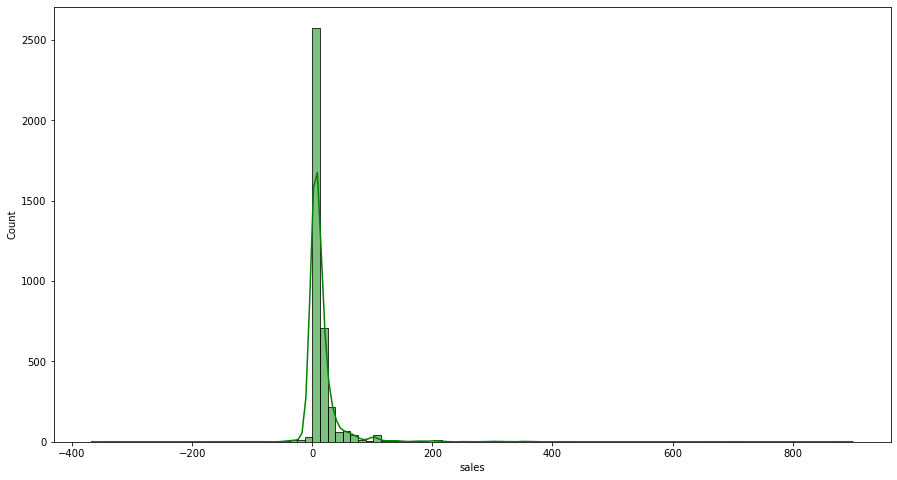

In [179]:
get_skewness(christmas_sales, 'christmas sales')

Sample skewness:  1.8196518115957157
The data distribution for Valentine sales is positively skewed.
Pearson's first coefficient of skewness:  1.8196518115957157
The data distribution for Valentine sales is positively skewed.


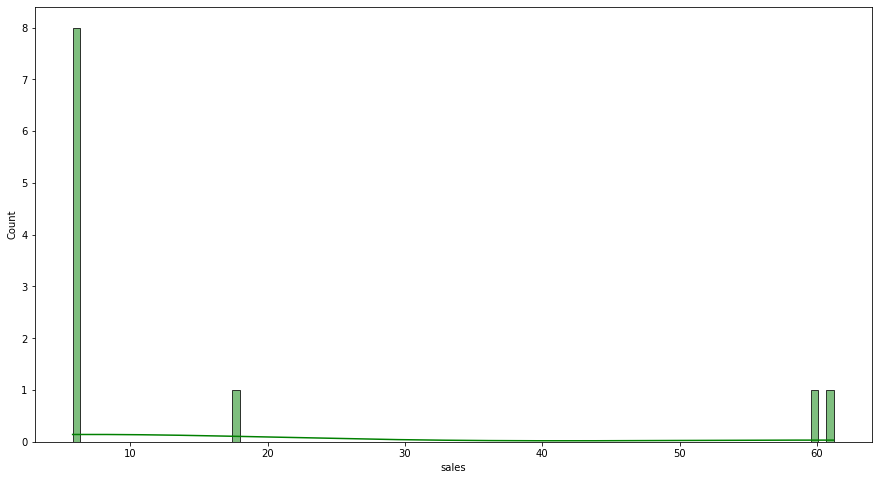

In [180]:
get_skewness(february_sales, 'Valentine sales')

The data for both Christmas sales and Valentine sales are non-normally distributed with a positive skewness, then you may consider using a non-parametric test such as the Mann-Whitney U test. This test can be used to compare the median values of two independent groups, without assuming a specific underlying distribution for the data.

In [181]:
# perform the Mann-Whitney U test
u, p_value = mannwhitneyu(february_sales, christmas_sales)

# print the results
print("Mann-Whitney U test results:")
print("U-statistic:", u)
print("p-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in Valentine and Christmas sales is statistically significant.")
else:
    print("There is not enough evidence to conclude a statistically significant difference in Valentine and Christmas sales.")

Mann-Whitney U test results:
U-statistic: 24260.0
p-value: 0.39957571109845247
There is not enough evidence to conclude a statistically significant difference in Valentine and Christmas sales.


In [182]:


red_sales = df[df['lemmatized_description'].str.contains('red')]['sales']


yellow_sales = df[df['lemmatized_description'].str.contains('yellow')]['sales']







Sample skewness:  16.817735052239524
The data distribution for Red Items sales is positively skewed.
Pearson's first coefficient of skewness:  16.817735052239524
The data distribution for Red Items sales is positively skewed.


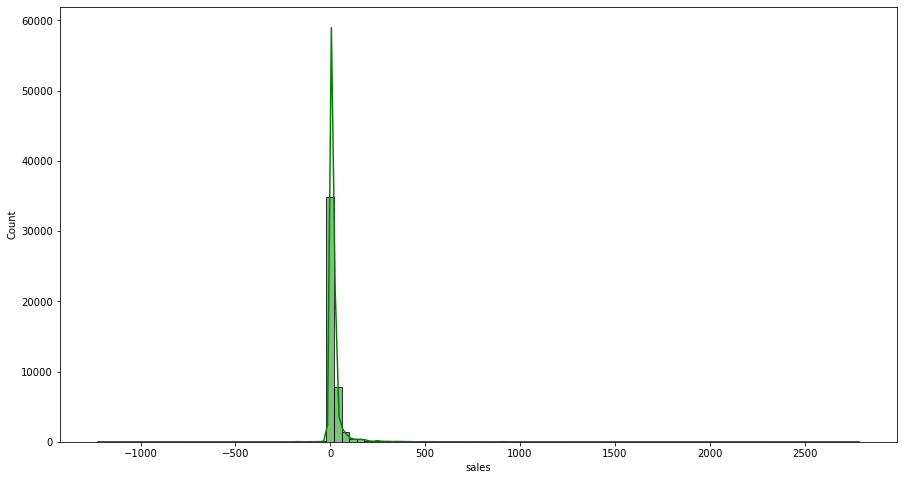

In [183]:
get_skewness(red_sales, 'Red Items sales')


In [184]:
# Perform the t-test
stat, p_value = ttest_ind(red_sales, yellow_sales)

# Check if the difference in sales between the two groups is statistically significant
if p_value < 0.05:
    print("There is a statistically significant difference in sales between items containing the word 'Red' and items containing the word 'Yellow'.")
else:
    print("There is not a statistically significant difference in sales between items containing the word 'Red' and items containing the word 'Yellow'.")


There is a statistically significant difference in sales between items containing the word 'Red' and items containing the word 'Yellow'.


Sample skewness:  18.757700645397147
The data distribution for Yellow Items sales is positively skewed.
Pearson's first coefficient of skewness:  18.757700645397144
The data distribution for Yellow Items sales is positively skewed.


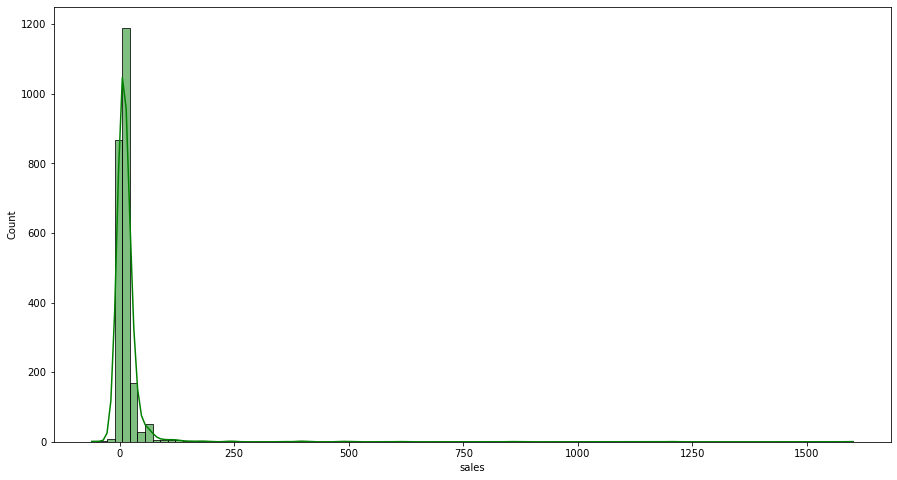

In [185]:

get_skewness(yellow_sales, 'Yellow Items sales')

In [186]:
# perform the Mann-Whitney U test
u, p_value = mannwhitneyu(red_sales, yellow_sales)

# print the results
print("Mann-Whitney U test results:")
print("U-statistic:", u)
print("p-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in red and yellow sales is statistically significant.")
else:
    print("There is not enough evidence to conclude a statistically significant difference in red and yellow sales.")

Mann-Whitney U test results:
U-statistic: 60534625.5
p-value: 1.347543243498293e-25
The difference in red and yellow sales is statistically significant.


lets's see about pink and blue

In [187]:


# Filter the dataframe to only include rows with the word "Pink" in the description
df_pink = df[df['lemmatized_description'].str.contains('pink')]

# Filter the dataframe to only include rows with the word "Blue" in the description
df_blue = df[df['lemmatized_description'].str.contains('blue')]

# Extract the sales values for each group
pink_sales = df_pink['sales'].values
blue_sales = df_blue['sales'].values




# perform the Mann-Whitney U test
u, p_value = mannwhitneyu(pink_sales, blue_sales)

# print the results
print("Mann-Whitney U test results:")
print("U-statistic:", u)
print("p-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in pink and blue sales is statistically significant.")
else:
    print("There is not enough evidence to conclude a statistically significant difference in pink and blue sales.")

Mann-Whitney U test results:
U-statistic: 303154799.5
p-value: 0.00728574126740856
The difference in pink and blue sales is statistically significant.


In [188]:
pink_sales.sum()


455766.64

In [189]:
blue_sales.sum()

280132.43000000005

In [190]:
red_sales.sum()

919381.79

In [191]:
yellow_sales.sum()

36211.240000000005

In [192]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter the dataframe to only include rows with the product category "home"
df_home = products[products['categories'] == 'home']

# Filter the dataframe to only include rows with the product category "kitchen"
df_kitchen = products[products['categories'] == 'kitchen']

# Extract the orders values for each group
home_orders = df_home['orders'].values
kitchen_orders = df_kitchen['orders'].values
# perform the Mann-Whitney U test
u, p_value = mannwhitneyu(home_orders, kitchen_orders)

# print the results
print("Mann-Whitney U test results:")
print("U-statistic:", u)
print("p-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in home and kitchen orders is statistically significant.")
else:
    print("There is not enough evidence to conclude a statistically significant difference in home and kitchen orders.")



Mann-Whitney U test results:
U-statistic: 117847.0
p-value: 0.05795162141235503
There is not enough evidence to conclude a statistically significant difference in home and kitchen orders.


In [193]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 531367 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   invoice_no              531367 non-null  object        
 1   stock_code              531367 non-null  object        
 2   description             531367 non-null  object        
 3   quantity                531367 non-null  int64         
 4   invoice_date            531367 non-null  datetime64[ns]
 5   unit_price              531367 non-null  float64       
 6   customer_id             399778 non-null  float64       
 7   sales                   531367 non-null  float64       
 8   lemmatized_description  531367 non-null  object        
 9   categories              531367 non-null  object        
 10  month_number            531367 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 48.6+ MB


In [194]:
df_monthly_revenue

invoice_date        sales   invoice_month
0    2018-11-30   103530.720   November 2018
1    2018-12-31   655517.170   December 2018
2    2019-01-31   626963.610    January 2019
3    2019-02-28   494409.010   February 2019
4    2019-03-31   661057.200      March 2019
5    2019-04-30   467291.311      April 2019
6    2019-05-31   775759.960        May 2019
7    2019-06-30   686052.870       June 2019
8    2019-07-31   711411.571       July 2019
9    2019-08-31   731660.140     August 2019
10   2019-09-30   947300.001  September 2019
11   2019-10-31  1123518.210    October 2019
12   2019-11-30  1461070.740   November 2019
13   2019-12-31   335190.760   December 2019

In [195]:


df_monthly_revenue['month'] = df_monthly_revenue['invoice_date'].dt.month

# Define summer months
summer_months = [4,5, 6, 7, 8]

# Define winter months
winter_months = [9,10, 11, 12]

# Extract the revenue data for summer months
summer_revenue = df_monthly_revenue[df_monthly_revenue['month'].isin(summer_months)]['sales']

# Extract the revenue data for winter months
winter_revenue = df_monthly_revenue[df_monthly_revenue['month'].isin(winter_months)]['sales']



# perform the Mann-Whitney U test
u, p_value = mannwhitneyu(summer_revenue, winter_revenue)

# print the results
print("Mann-Whitney U test results:")
print("U-statistic:", u)
print("p-value:", p_value)

# interpret the results
alpha = 0.05
if p_value < alpha:
    print("The difference in summer and winter sales is statistically significant.")
else:
    print("There is not enough evidence to conclude a statistically significant difference in summer and winter sales.")


Mann-Whitney U test results:
U-statistic: 14.0
p-value: 0.9307359307359306
There is not enough evidence to conclude a statistically significant difference in summer and winter sales.


##  Conclusions:

+ The demand for items had seen a rapid rise from September and around the winter_christmas season.

+ The revenues in November 2019 were the highest.

+ The revenues from repeat customers represent a very large piece of the total revenues: they range from 32 to 57%.

+ home , kitchen , knick knack , decorations & gifts , kids are the  most popular categories

+ Red is the preferred color

+ Sales rise toward winter, but there is no statistical difference in items themed Valentine and Items themed Christmas      
    
+ customers tend to purchase togheter the same Items or sets of item in different variations/color    
    
    
    